# Day3

# 課題　「精神病を患う人を予測する」(Mental Health in Tech Survey)
[URL:]https://www.kaggle.com/osmi/mental-health-in-tech-survey/data
## 目次
###_[データの入手、データの前処理]_###  
__1.データ確認__
- 1-1説明変数と目的変数の意味  
- 1-2データ内容の確認  
- 1-3データを確認しての所見  

__2.欠測値の確認__  
- 2-1 欠損値「state」の処理  
- 2-2 欠損値「self_employed」の処理  
- 2-3 欠損値「work_interfere」の処理  
- 2-4 欠損値「comment」の処理  
- 2-5 欠損値の対応まとめ  

__3.外れ値、名寄せの対応__  
- 3-1 Ageの外れ値の除外  
- 3-2 Gender の名寄せ  
- 3-3 Country の名寄せ  
- 3-4 work_interfere の名寄せ  
- 3-5 名寄せ・外れ値の対応まとめ  
    
__4.目的変数と説明変数の関係__  
- 4-1 treatment と Age  
- 4-2 treatment と その他の説明変数  
- 4-3 関係性のまとめ  
    
###_[手法の選択、ハイパーパラメータの選択、モデルの学習]_###  
__5.各アルゴリズムの精度検証（CV済みモデルにて）__  
- 5-1ロジスティック回帰(LogisticRegression)  
- 5-2決定木(DecisionTreeClassifier)  
- 5-3バギング(BaggingClassifier)
- 5-4ランダムフォレスト(RandomForestClassifier)  
- 5-5アダブースト(AdaBoostClassifier)  
- 5-6K近傍法（KNeighborsClassifier） 
- 5-7SVM(SVC)

###_[モデルの評価]_###  
__6.各モデルの比較__  
- 6-1モデル比較  
- 6-2所見  

###_[精度は十分か]_###  
__7.精度向上検討__  
- 7-1検討事項
- 7-2検討結果  

__8.まとめ__  
- 8-1まとめ
- 8-2終わりに

# 1.データ確認

## 1-1説明変数と目的変数の意味

[URL:]https://www.kaggle.com/osmi/mental-health-in-tech-survey/data  
      ↑ ※ 英語による詳細表記あり
# Columns
'Timestamp' = 時間  
'Age' = 年齢  
'Gender' = 性別  
'Country' = 国  
'state' = アメリカに住んでいる場合のどの州や地域に住んでいるのか  
'self_employed' = 自営業かどうか  
'family_history' = 家族の中で精神病になったことがあるかどうか  
__'treatment' = 精神病の治療を受けたことがあるか(目的変数)__  
'work_interfere' = 精神病を持っている場合、仕事の妨害になると感じるか  
'no_employees' = 会社組織の従業員の数  
'remote_work' = 少なくとも50%はリモートやオフィス外で働いているか  
'tech_company' = 雇用主が、Tech Company/Organizationかどうか  
'benefits' = 雇用主が、精神保険給付を提供しているか  
'care_options' = 雇用主が提供する精神保健医療の選択肢を知っていますか？  
'wellness_program' = あなたの雇用主は従業員の健康プログラムの一環としてメンタルヘルスについて議論しましたか？  
'seek_help' = あなたの雇用主は、メンタルヘルスの問題や助けを求める方法についての詳細を学ぶためのリソースを提供していますか？  
'anonymity' = メンタルヘルスや薬物乱用の治療リソースを利用することを選択した場合は、匿名性が保護されていますか？  
'leave' = あなたが精神的健康状態のために休暇をとることはいかがですか？  
'mental_health_consequence' = あなたの雇用主との精神保健問題について話し合うことは悪影響を及ぼすと思いますか？  
'phys_health_consequence' = あなたの雇用主との健康上の問題について議論することは、否定的な結果をもたらすと思いますか？  
'coworkers' = あなたの同僚と精神衛生上の問題について話し合いたいですか？  
'supervisor' = あなたはあなたの直属の上司と精神衛生上の問題について話し合いたいですか？  
'mental_health_interview' = インタビューで潜在的な雇用主との精神衛生問題を提起しますか？  
'phys_health_interview' = インタビューで潜在的な雇用主との身体的健康問題を提起しますか？  
'mental_vs_physical' = あなたの雇用主は精神的健康を肉体的健康と同じくらい重視していると感じますか？  
'obs_consequence' = あなたの職場に精神的健康状態の同僚のために否定的な結果を聞いたり、観察しましたか？  
'comments' = 追加のメモやコメント 
  
  
  
__【目的変数】'treatment' = 精神病の治療を受けたことがあるか__  
__【説明変数】'treatment'以外の項目__

In [1]:
#ライブラリ読み込み
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#データ読み込み
df_data = pd.read_csv("../Downloads/survey.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())
print(df_data.shape)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


(1259, 27)


## 1-2データ内容の確認

In [3]:
#各データの種類
for column in df_data.columns.values:
    if column in ["Timestamp", "comments"]:
    #if column in ["Timestamp"]:
    #if column in ["comments"]:
        continue
    print(column, ":", len(set(df_data[column])), "件")
    print(set(df_data[column]))
    print()
#Timestampとcommentsも含めるのはどうすれば？？
 #→timestampを使うためには、
 #    例えばdayとかmonthのような要素に変換する必要があり、
 #    commentを使うためには、例えば文字数とかのような処理を実施すると使えるようになると思います。

Age : 53 件
{5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, -1726, 72, 329, -29, -1, 99999999999}

Gender : 49 件
{'maile', 'Mail', 'All', 'Make', 'Trans woman', 'Agender', 'm', 'Female (cis)', 'Guy (-ish) ^_^', 'male', 'Female ', 'msle', 'Female', 'F', 'f', 'Femake', 'Nah', 'cis-female/femme', 'Man', 'queer/she/they', 'Male ', 'cis male', 'Genderqueer', 'queer', 'fluid', 'femail', 'Cis Male', 'p', 'woman', 'Enby', 'Androgyne', 'Mal', 'non-binary', 'something kinda male?', 'female', 'Male (CIS)', 'Trans-female', 'ostensibly male, unsure what that really means', 'Male', 'Malr', 'M', 'Male-ish', 'Female (trans)', 'A little about you', 'Cis Female', 'Neuter', 'Woman', 'Cis Man', 'male leaning androgynous'}

Country : 48 件
{'Uruguay', 'Colombia', 'Czech Republic', 'Nigeria', 'Brazil', 'Bulgaria', 'Latvia', 'Netherlands', 'Philippines', 'Thailand', 'Bosnia

In [4]:
# 各データの属性の確認
print(df_data.dtypes)

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


### 1-3データを確認しての所見  

→@'Timestamp'については回答を記入した時間なので、説明変数より除外して構わないと思われる。  
→@'comments'の内容がおかしいものは"treatment"が"Yes"の可能性が高い気がする。何かしらの処理をして解析に反映してみたい。  
→@'comments'の文字数に着目して"treatment"の"Yes"、"No"の割合を確認してみたい。  

# 2.欠測値の確認

In [5]:
# 欠測値の数
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

,num of missing
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [6]:
# 各カラム毎に欠損値の数の合計を計算する
df_missing = pd.DataFrame(df_data.isnull().sum(), columns=["欠損データ数"])

# 全データに締める欠損データの数を割合で確認するためのデータを準備する
total_count = df_data.shape[0] # 全データ数を取得する
df_missing_rate = df_missing[(df_missing["欠損データ数"] > 0)] /total_count*100 # 欠損値の数を全データ数で割ることで割合を求める
df_missing_rate = df_missing_rate.rename(columns={'欠損データ数': '欠損データの割合(%)'})

print("欠損データの割合を表示。（※ 全体のデータ件数は、", total_count, "件）")
pd.concat([df_missing[(df_missing["欠損データ数"] > 0)], df_missing_rate], axis=1)

欠損データの割合を表示。（※ 全体のデータ件数は、 1259 件）


,欠損データ数,欠損データの割合(%)
state,515,40.905481
self_employed,18,1.429706
work_interfere,264,20.969023
comments,1095,86.973789


## 2-1 欠損値「state」の確認  

In [7]:
#欠測値の処理（state）
print("アメリカに住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] == "United States"].head())
print("アメリカ以外に住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] != "United States"].head())

# アメリカ以外に住んでいる人が欠損値となることがわかったので、"no_data"という文字列で置換
df_data = df_data.fillna({"state":"no_data"})
print("欠損値をno_dataの文字列に置き換え")
df_data[["Country", "state"]].head()

アメリカに住んでいる人のデータ


,Country,state
0,United States,IL
1,United States,IN
4,United States,TX
5,United States,TN
6,United States,MI


アメリカ以外に住んでいる人のデータ


,Country,state
2,Canada,NaN
3,United Kingdom,NaN
7,Canada,NaN
9,Canada,NaN
11,Bulgaria,NaN


欠損値をno_dataの文字列に置き換え


,Country,state
0,United States,IL
1,United States,IN
2,Canada,no_data
3,United Kingdom,no_data
4,United States,TX


## 2-2 欠損値「self_employed」の処理

In [8]:
#欠測値の処理（self_employed）
df_data = df_data.fillna({"self_employed":"no_data"})

## 2-3 欠損値「work_interfere」の処理

In [9]:
#欠測値の処理（work_interfere）
df_data = df_data.fillna({"work_interfere":"no_data"})

## 2-4 欠損値「comment」の処理

In [10]:
#欠測値の処理（comments）
df_data = df_data.fillna({"comments":""})

## 2-5 欠損値の対応まとめ

'state' = アメリカに住んでいる場合のどの州や地域に住んでいるのか  
【欠損データの数】_515件、【欠損データの割合】_約41%  
州を入力する項目であるため、アメリカに住んでいない場合は欠損値となる  
欠損値の場合は、「no_data」という文字列で補完した  
→@直接は関係はないとは思うが、裕福な地域や貧困地域、都会や田舎、進学率、離職率などのデータと比較して見る価値はある。  
→@特定の州だけ異常に高くなっていたり、低くなっていないか確認してみたい。  

'self_employed' = 自営業かどうか  
【欠損データの数】_18件、【欠損データの割合】_ 約1%  
欠損値の場合は、「no_data」という文字列で補完した  
→@'Age'との関係性はどうなっているか確認したい。18才未満の回答は？異常値の回答との関係。  
→@今回のテーマで自営業であった場合の影響の推測。→精神保険給付や精神保健医療など、雇用主や周りのフォロー。  

'work_interfere' = 精神病を持っている場合、仕事の妨害になると感じるか  
【欠損データの数】_264件、【欠損データの割合】_約21%  
欠損値の場合は、「no_data」という文字列で補完した  
→@質問の意図が捉えにくいが欠測データの数が多いと感じる。精神病を持っていない人は回答していないのではないか？確認してみたい。  
→@元々の選択肢が'Sometimes', 'Rarely', 'Never', 'Often'の4つなので、むしろ回答しやすいような。。  

'comments' = 追加のメモやコメント  
【欠損データの数】_1095件、【欠損データの割合】_約87%  
欠損値の場合は、空文字で補完した  

In [11]:
# 欠測値の数（再確認）
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

,num of missing
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


# 3.外れ値、名寄せの対応

## 3-1 Ageの外れ値の除外

現状確認


Age,-1726,-29,-1,5,8,11,18,19,20,21,...,57,58,60,61,62,65,72,329,99999999999,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,1,0,1,0,1,4,5,4,8,...,1,0,1,0,1,1,0,0,0,622
Yes,1,0,1,0,1,0,3,4,2,8,...,2,1,1,1,0,0,1,1,1,637
All,1,1,1,1,1,1,7,9,6,16,...,3,1,2,1,1,1,1,1,1,1259


外れ値削除後


Age,5,8,11,18,19,20,21,22,23,24,...,55,56,57,58,60,61,62,65,72,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,1,0,1,4,5,4,8,10,27,28,...,0,1,1,0,1,0,1,1,0,621
Yes,0,1,0,3,4,2,8,11,24,18,...,3,3,2,1,1,1,0,0,1,633
All,1,1,1,7,9,6,16,21,51,46,...,3,4,3,1,2,1,1,1,1,1254


外れ値削除後の年齢データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


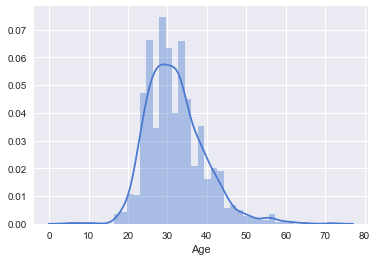

In [12]:
#"Age"の外れ値の対応

#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_c)  

# 外れ値を削除
df_data = df_data[(0<df_data["Age"])&(df_data["Age"]<100)]

#外れ値を削除後
print("外れ値削除後")
df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_c) 

#import seaborn as sns
# 外れ値を削除後のデータの分布確認
print("外れ値削除後の年齢データの分布の確認")
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data["Age"]);

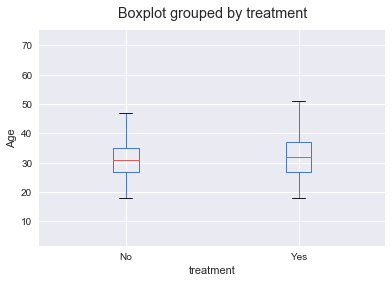

In [13]:
#箱ひげ図の見方
#区間D：ひげの上端（最大値）から箱の上端（第三四分位）まで
#区間C：箱の上端（第三四分位）から箱の中央の線（中央値）まで
#区間B：箱の中央の線（中央値）から箱の下端（第一四分位）まで
#区間A：箱の下端（第一四分位）からひげの下端（最小値）まで
#A、B、C、Dの4区間のなかに、それぞれ同じ個数だけデータが入っています。
#しかし、同じ個数でもその区間の長さが異なることから、データのばらつき具合を知ることができます。
#例えば、区間Bと区間Dでは、区間Bの方が区間が短いことからよりデータが集中していることが分かります。
#また、箱の高さ（区間Bと区間Cを合わせたもの）は全データの半分のデータを表すことから、
#およそ「２7」から「３７」の範囲に全体の半分のデータが存在することが読み取れます。

df_data.boxplot(column="Age",by="treatment")
plt.title("") #意外と必要
plt.ylabel("Age")
plt.show()

## 3-※ Age の名寄せ

In [14]:
#Ageの名寄せ（項目確認）
#col = "Age"
#df_data[col].replace("All","all", inplace=True)
#df_Age = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
#display(df_Age.T.sort_values("All",ascending=False))

In [15]:
#Ageの名寄せ(作業)
#{5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65,  -1726, 72, 329, -29, -1, 99999999999}

#世代別
#10才未満",10代",20代",30代",40代",50代",60代",70代"


#df_data["Age2"] = df_data["Age"].map({5:"10才未満",8:"10才未満",11:"10代",18:"10代",19:"10代",20:"20代",
#                                       21:"20代",22:"20代",23:"20代",24:"20代",25:"20代",26:"20代",
#                                       27:"20代",28:"20代",29:"20代",30:"30代",31:"30代",32:"30代",
#                                       33:"30代",34:"30代",35:"30代",36:"30代",37:"30代",38:"30代",
#                                       39:"30代",40:"40代",41:"40代",42:"40代",43:"40代",44:"40代",
#                                       45:"40代",46:"40代",47:"40代",48:"40代",49:"40代",50:"50代",
#                                       51:"50代",53:"50代",54:"50代",55:"50代",56:"50代",57:"50代",
#                                       58:"50代",60:"60代",61:"60代",62:"60代",65:"60代",72:"70代"})

#col = "Age2"
#df_Age = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
#display(df_Age)


## 3-2 Gender の名寄せ

In [16]:
#性別の名寄せ（項目確認）
col = "Gender"
df_data[col].replace("All","all", inplace=True)
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender.T.sort_values("All",ascending=False))

treatment,No,Yes,All
Gender,,,
All,621,633,1254
Male,329,284,613
male,112,93,205
Female,37,84,121
M,69,47,116
female,16,46,62
F,12,26,38
m,20,14,34
f,6,9,15


In [17]:
#性別の名寄せ(作業)
df_data["Gender2"] = df_data["Gender"].map({"Male":"Male","Female":"Female","male":"Male","female":"Female","M":"Male","F":"Female"})
col = "Gender2" #ざっくり仕分け
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender)


df_data["Gender3"] = df_data["Gender"].map({"Male":"Male","male":"Male","Female":"Female","M":"Male","female":"Female",
                                            "F":"Female","m":"Male","f":"Female","Make":"Male","Male":"Male","Woman":"Female",
                                            "Female (trans)":"Female","Cis Male":"Male","Man":"Male","Female":"Female","non-binary":"?",
                                            "cis-female/femme":"Female","p":"?","femail":"Female","fluid":"?","maile":"Male",
                                            "ostensibly male, unsure what that really means":"?","woman":"Female","something kinda male?":"?",
                                            "queer":"?","male leaning androgynous":"?","cis male":"Male","msle":"Male",
                                            "queer/she/they":"?","A little about you":"?","all":"?","Guy (-ish) ^_^":"?",
                                            "Androgyne":"?","Cis Female":"Female","Cis Man":"Male","Enby":"?","Femake":"Female",
                                            "Female (cis)":"Female","Genderqueer":"?","Mail":"Male","Trans-female":"Female",
                                            "Mal":"Male","Male (CIS)":"Male","Male-ish":"Male","Malr":"Male","Agender":"?","Neuter":"?",
                                            "Trans woman":"Female","Nah":"?"})
col = "Gender3" #しっかり仕分け@一概にきちんと仕分ければ良いわけではない？
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender)

#元データの個数　No621,Yes633,All1254
#MaleとFemaleが２つある？？
#たぶん各々２つ目は反映されてない
#２つ目のMale　Noが1個 Yesが2個
#２つ目のFemale　Noが1個 Yesが1個


Gender2,Female,Male,All
treatment,,,
No,65,510,575
Yes,156,424,580
All,221,934,1155


Gender3,?,Female,Male,All
treatment,,,,
No,3,77,539,619
Yes,12,172,446,630
All,15,249,985,1249


## 3-3 Country の名寄せ

In [18]:
#Country の名寄せ（項目確認）
col = "Country"
df_data[col].replace("All","all", inplace=True)
df_Country = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_Country.T.sort_values("All",ascending=False))


treatment,No,Yes,All
Country,,,
All,621,633,1254
United States,340,408,748
United Kingdom,92,92,184
Canada,35,37,72
Germany,24,21,45
Netherlands,18,9,27
Ireland,14,13,27
Australia,8,13,21
France,11,2,13


In [19]:
#【'Country' = 精神病を持っている場合、仕事の妨害になると感じるか】の名寄せ(作業)

#{'Ireland', 'France', 'Moldova', 'Hungary', 'China', 'Poland', 
# 'Nigeria', 'Switzerland', 'Czech Republic', 'Croatia', 'Italy',
# 'New Zealand', 'Singapore', 'Belgium', 'Mexico', 'Slovenia',
# 'Bosnia and Herzegovina', 'Norway', 'Canada', 'Austria', 'Germany',
# 'Colombia', 'Spain', 'Romania', 'United States', 'India', 'Japan',
# 'Sweden', 'Latvia', 'Denmark', 'Philippines', 'Finland', 'United Kingdom',
# 'Bahamas, The', 'Costa Rica', 'Bulgaria', 'Israel', 'Georgia', 'Greece',
# 'Portugal', 'Zimbabwe', 'Netherlands', 'Australia', 'Uruguay', 'Thailand',
# 'Russia', 'South Africa', 'Brazil'}

#大陸別
#'EUROPA','ASIA','AFRICA','OCEANIA','NORTHAMERICA','SOUTHAMERICA'

#大陸別2 * 北アメリカから' USA 'だけ特出し
#'EUROPA','ASIA','AFRICA','OCEANIA',' USA',' NORTHAMERICA','SOUTHAMERICA'




df_data["Country2"] = df_data["Country"].map({'Ireland':'EUROPA', 'France':'EUROPA', 'Moldova':'EUROPA', 'Hungary':'EUROPA', 
                                               'China':'ASIA', 'Poland':'EUROPA','Nigeria':'AFRICA', 'Switzerland':'EUROPA',
                                               'Czech Republic':'EUROPA', 'Croatia':'EUROPA', 'Italy':'EUROPA',
                                               'New Zealand':'OCEANIA', 'Singapore':'ASIA', 'Belgium':'EUROPA', 
                                               'Mexico':'NORTHAMERICA', 'Slovenia':'EUROPA',
                                               'Bosnia and Herzegovina':'EUROPA', 'Norway':'EUROPA', 'Canada':'NORTHAMERICA', 
                                               'Austria':'EUROPA', 'Germany':'EUROPA','Colombia':'SOUTHAMERICA', 'Spain':'EUROPA', 
                                               'Romania':'EUROPA', 'United States':'NORTHAMERICA', 'India':'ASIA', 'Japan':'ASIA',
                                               'Sweden':'EUROPA', 'Latvia':'EUROPA', 'Denmark':'EUROPA', 'Philippines':'ASIA',
                                               'Finland':'EUROPA', 'United Kingdom':'EUROPA','Bahamas, The':'NORTHAMERICA',
                                               'Costa Rica':'NORTHAMERICA', 'Bulgaria':'EUROPA', 'Israel':'EUROPA', 'Georgia':'EUROPA',
                                               'Greece':'EUROPA','Portugal':'EUROPA', 'Zimbabwe':'AFRICA', 'Netherlands':'EUROPA', 
                                               'Australia':'OCEANIA', 'Uruguay':'SOUTHAMERICA', 'Thailand':'ASIA','Russia':'ASIA', 
                                               'South Africa':'AFRICA', 'Brazil':'SOUTHAMERICA'})
                                              
col = "Country2"
df_Country = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_Country)




# 北アメリカから' USA 'だけ特出し
df_data["Country3"] = df_data["Country"].map({'Ireland':'EUROPA', 'France':'EUROPA', 'Moldova':'EUROPA', 'Hungary':'EUROPA', 
                                               'China':'ASIA', 'Poland':'EUROPA','Nigeria':'AFRICA', 'Switzerland':'EUROPA',
                                               'Czech Republic':'EUROPA', 'Croatia':'EUROPA', 'Italy':'EUROPA',
                                               'New Zealand':'OCEANIA', 'Singapore':'ASIA', 'Belgium':'EUROPA', 
                                               'Mexico':'NORTHAMERICA', 'Slovenia':'EUROPA',
                                               'Bosnia and Herzegovina':'EUROPA', 'Norway':'EUROPA', 'Canada':'NORTHAMERICA', 
                                               'Austria':'EUROPA', 'Germany':'EUROPA','Colombia':'SOUTHAMERICA', 'Spain':'EUROPA', 
                                               'Romania':'EUROPA', 'United States':'USA', 'India':'ASIA', 'Japan':'ASIA',
                                               'Sweden':'EUROPA', 'Latvia':'EUROPA', 'Denmark':'EUROPA', 'Philippines':'ASIA',
                                               'Finland':'EUROPA', 'United Kingdom':'EUROPA','Bahamas, The':'NORTHAMERICA',
                                               'Costa Rica':'NORTHAMERICA', 'Bulgaria':'EUROPA', 'Israel':'EUROPA', 'Georgia':'EUROPA',
                                               'Greece':'EUROPA','Portugal':'EUROPA', 'Zimbabwe':'AFRICA', 'Netherlands':'EUROPA', 
                                               'Australia':'OCEANIA', 'Uruguay':'SOUTHAMERICA', 'Thailand':'ASIA','Russia':'ASIA', 
                                               'South Africa':'AFRICA', 'Brazil':'SOUTHAMERICA'})
                                              
col = "Country3"
df_Country = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_Country)


Country2,AFRICA,ASIA,EUROPA,NORTHAMERICA,OCEANIA,SOUTHAMERICA,All
treatment,,,,,,,
No,3,16,206,378,11,7,621
Yes,4,5,157,447,18,2,633
All,7,21,363,825,29,9,1254


Country3,AFRICA,ASIA,EUROPA,NORTHAMERICA,OCEANIA,SOUTHAMERICA,USA,All
treatment,,,,,,,,
No,3,16,206,38,11,7,340,621
Yes,4,5,157,39,18,2,408,633
All,7,21,363,77,29,9,748,1254


## 3-※ 【'state' = アメリカに住んでいる場合のどの州や地域に住んでいるのか】の名寄せ

In [20]:
#state の名寄せ（項目確認）
col = "state"
df_data[col].replace("All","all", inplace=True)
df_state = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_state.T.sort_values("All",ascending=False))


treatment,No,Yes,All
state,,,
All,621,633,1254
no_data,285,228,513
CA,52,86,138
WA,29,41,70
NY,27,30,57
TN,27,18,45
TX,19,25,44
IL,9,20,29
OR,12,17,29


## 3-4 work_interfere の名寄せ

In [21]:
#【'work_interfere' = 精神病を持っている場合、仕事の妨害になると感じるか】の名寄せ（項目確認）
col = "work_interfere"
df_data[col].replace("All","all", inplace=True)
df_work_interfere = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_work_interfere.T.sort_values("All",ascending=False))

treatment,No,Yes,All
work_interfere,,,
All,621,633,1254
Sometimes,107,357,464
no_data,259,4,263
Never,183,30,213
Rarely,51,122,173
Often,21,120,141


In [22]:
#【'work_interfere' = 精神病を持っている場合、仕事の妨害になると感じるか】の名寄せ(作業)
df_data["work_interfere2"] = df_data["work_interfere"].map({"Sometimes":"Yes","no_data":"No","Never":"No","Rarely":"Yes","Often":"Yes"})
col = "work_interfere2"
df_work_interfere = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_work_interfere)


work_interfere2,No,Yes,All
treatment,,,
No,442,179,621
Yes,34,599,633
All,476,778,1254


## 3-※ 【'no_employees' = 会社組織の従業員の数】の名寄せ

In [23]:
#【'no_employees' = 会社組織の従業員の数】の名寄せ（項目確認）
col = "no_employees"
df_data[col].replace("All","all", inplace=True)
df_no_employees = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_no_employees.T.sort_values("All",ascending=False))

treatment,No,Yes,All
no_employees,,,
All,621,633,1254
6-25,162,127,289
26-100,139,149,288
More than 1000,135,146,281
100-500,81,95,176
1-5,71,89,160
500-1000,33,27,60


## 3-※ 【'leave' = あなたが精神的健康状態のために休暇をとることはいかがですか？】の名寄せ

In [24]:
#【'leave' = あなたが精神的健康状態のために休暇をとることはいかがですか？】の名寄せ（項目確認）
col = "leave"
df_data[col].replace("All","all", inplace=True)
df_leave = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_leave.T.sort_values("All",ascending=False))

treatment,No,Yes,All
leave,,,
All,621,633,1254
Don't know,308,253,561
Somewhat easy,135,131,266
Very easy,103,102,205
Somewhat difficult,44,81,125
Very difficult,31,66,97


In [25]:
#【'leave' = あなたが精神的健康状態のために休暇をとることはいかがですか？】の名寄せ(作業)
df_data["leave2"] = df_data["leave"].map({"Don't know":"Don't know","Somewhat easy":"easy","Very easy":"easy","Somewhat difficult":"difficult","Very difficult":"difficult"})
col = "leave2"
df_leave = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_leave)

leave2,Don't know,difficult,easy,All
treatment,,,,
No,308,75,238,621
Yes,253,147,233,633
All,561,222,471,1254


## 3-※ 【'comments' = 追加のメモやコメント】の名寄せ

In [26]:
#【'comments' = 追加のメモやコメント】の名寄せ（項目確認）
col = "comments"
df_data[col].replace("All","all", inplace=True)
df_comments = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_comments.T.sort_values("All",ascending=False))

treatment,No,Yes,All
comments,,,
All,621,633,1254
,563,528,1091
* Small family business - YMMV.,1,4,5
Israel has public health insurance for everyone. Everyone has free mental health coverage and it's quite good. So that explains some of my answers.,1,0,1
My seniority at the company and rapport with the owners has helped me gain support for seeking help regarding my mental health as well as being able to take time off or work from home when an episode starts.However I don't feel that the company's stance on mental health is as clear as say something like vision or dental. There's very much a stigma.,0,1,1
My work is using my brain. I do it incredibly well.I make an effort to avoid diagnosis of anything mental health related because I am convinced it would only affect me negatively.,1,0,1
Nice job on the text field for gender :-),1,0,1
No benefits at this organization but my employer/direct supervisor has had positive and constructive conversations with me about physical and mental health. Supervisor offered solutions advice time/energy to get help if I ever felt that needed it. (though it would have to be at my own expense). I feel safe sharing personal info with this particular person/company but this environment is the exception rather than the norm in my 15+ years as a tech worker. I would never feel safe enough to reveal info about any mental health concerns with any previous employers in the tech industry for fear of negative perceptions job loss performance dings etc.,1,0,1
None of us who are already in marginal groups in tech--the non-young the non-male the non-white--will risk our careers to admit another source of stigma: poor health.,1,0,1


In [27]:
#【'comments' = 追加のメモやコメント】の名寄せ(作業)
#df_data["comments2"] = df_data["comments"].map({ })
#col = "comments2"
#df_comments = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
#display(df_comments)

## 3-5 名寄せ・外れ値の対応まとめ

__Age__  
__外れ値を除外__  
__0歳 ~ 100歳までのデータを対象とした__  
→@5,8,11歳も異常値でもいい気がする。@30歳前後の回答が多い

__Gender__  
__男性:("Male") ※下記の項目を"Male"と仕分け__  
__"Male",""male","M"__  

__女性:("Female") ※下記の項目を"Female"と仕分け__  
__"Female","female","F"__  

"Male":934件、"Female":221件、欠除94件

→@１つ１つの項目をしっかり仕分けした際によく分からない回答("？")と回答した場合、"treatment"の"Yes"の回答の割合が多い  
→@男性は"treatment"の"No"の回答の割合が多い  
→@女性は"treatment"の"Yes"の回答の割合が多い 


__Country__  
__大陸別に仕分け__  
__'EUROPA','ASIA','AFRICA','OCEANIA',' USA',' NORTHAMERICA','SOUTHAMERICA'__

→@大陸別2 * 北アメリカから' USA 'だけ特出し


__work_interfere__  
__Yes ※下記の項目を"Yes"と仕分け__  
__"Yes","Rarely","Often"__  

__No ※下記の項目を"No"と仕分け__  
__"no_data","Never"__  

→@欠測値での考察（↓下記にも記載）を元に回答をYesとNoに仕分けてみた。  
→@質問の意図が捉えにくいが欠測データの数が多いと感じる。精神病を持っていない人は回答していないのではないか？確認してみたい。  


__leave__  
__Don't know ※下記の項目を"Don't know"と仕分け__  
__"Don't know"__  

__easy ※下記の項目を"easy"と仕分け__  
__"Somewhat easy","Very easy"__  

__difficult ※下記の項目を"difficult"と仕分け__  
__"Somewhat difficult","Very difficult"__  



# 4.目的変数と説明変数の関係

## 4-1 treatment と Age

精神と年齢の関係性


Age,5,8,11,18,19,20,21,22,23,24,...,55,56,57,58,60,61,62,65,72,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,1,0,1,4,5,4,8,10,27,28,...,0,1,1,0,1,0,1,1,0,621
Yes,0,1,0,3,4,2,8,11,24,18,...,3,3,2,1,1,1,0,0,1,633
All,1,1,1,7,9,6,16,21,51,46,...,3,4,3,1,2,1,1,1,1,1254


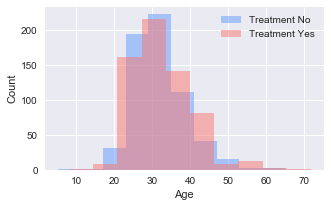

In [28]:
#目的変数@treatment
#説明変数@treatment以外の項目

#精神(treatment)と年齢(Age)の関係性
print("精神と年齢の関係性")
df_data_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_data_c) 

# ヒストグラムで年代別の傾向を見てみる
plt.figure(figsize=(5,3))
df_data["Age"][df_data["treatment"] == "No"].hist(color="#5F9BFF", alpha=.5, label=["Treatment No"]) # 薄い青色
df_data["Age"][df_data["treatment"] == "Yes"].hist(color="#F8766D", alpha=.5, label=["Treatment Yes"]) # 薄い赤色
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

#20代以下はNoの割合が多いが、30代以上になるとYesの割合が多くなる。
#年齢につれ対象期間が長くなるので当たり前と言えば当たり前だが。。

## 4-2 treatment と その他の説明変数  

*******************************
self_employed


self_employed,No,Yes,no_data,All
treatment,,,,
No,544,68,9,621
Yes,548,76,9,633
All,1092,144,18,1254


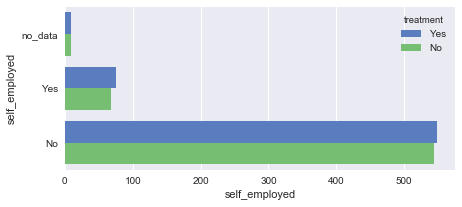


*******************************
family_history


family_history,No,Yes,All
treatment,,,
No,494,127,621
Yes,270,363,633
All,764,490,1254


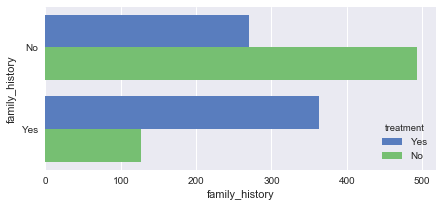


*******************************
work_interfere


work_interfere,Never,Often,Rarely,Sometimes,no_data,All
treatment,,,,,,
No,183,21,51,107,259,621
Yes,30,120,122,357,4,633
All,213,141,173,464,263,1254


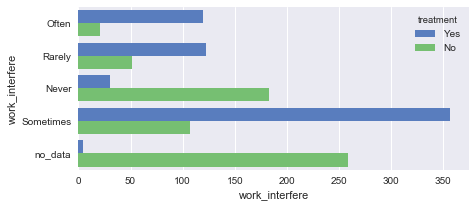


*******************************
no_employees


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
treatment,,,,,,,
No,71,81,139,33,162,135,621
Yes,89,95,149,27,127,146,633
All,160,176,288,60,289,281,1254


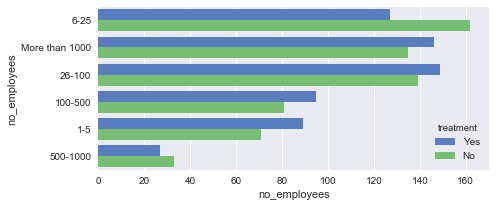


*******************************
remote_work


remote_work,No,Yes,All
treatment,,,
No,444,177,621
Yes,437,196,633
All,881,373,1254


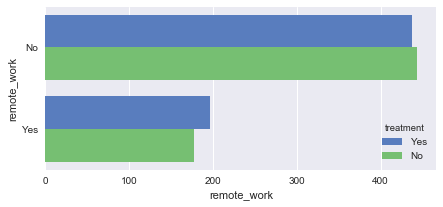


*******************************
tech_company


tech_company,No,Yes,All
treatment,,,
No,104,517,621
Yes,122,511,633
All,226,1028,1254


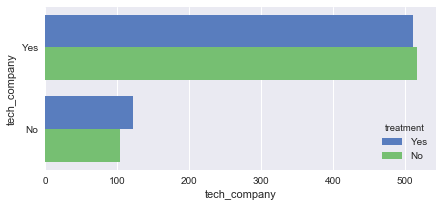


*******************************
benefits


benefits,Don't know,No,Yes,All
treatment,,,,
No,257,193,171,621
Yes,151,179,303,633
All,408,372,474,1254


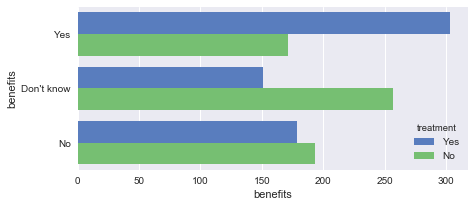


*******************************
care_options


care_options,No,Not sure,Yes,All
treatment,,,,
No,293,191,137,621
Yes,206,123,304,633
All,499,314,441,1254


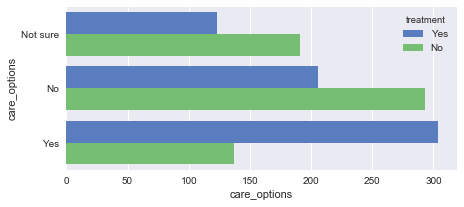


*******************************
wellness_program


wellness_program,Don't know,No,Yes,All
treatment,,,,
No,106,422,93,621
Yes,81,417,135,633
All,187,839,228,1254


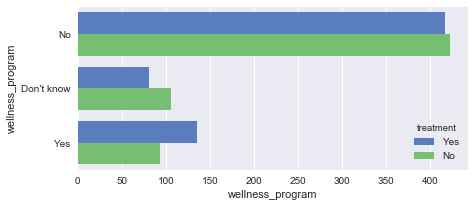


*******************************
seek_help


seek_help,Don't know,No,Yes,All
treatment,,,,
No,197,323,101,621
Yes,166,320,147,633
All,363,643,248,1254


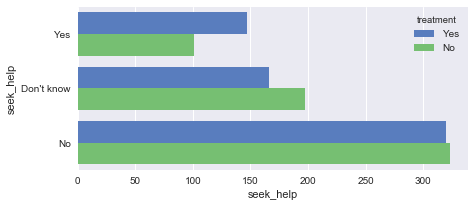


*******************************
anonymity


anonymity,Don't know,No,Yes,All
treatment,,,,
No,447,27,147,621
Yes,369,37,227,633
All,816,64,374,1254


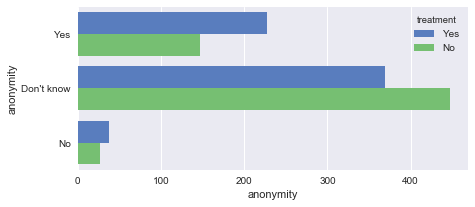


*******************************
leave


leave,Don't know,Somewhat difficult,Somewhat easy,Very difficult,Very easy,All
treatment,,,,,,
No,308,44,135,31,103,621
Yes,253,81,131,66,102,633
All,561,125,266,97,205,1254


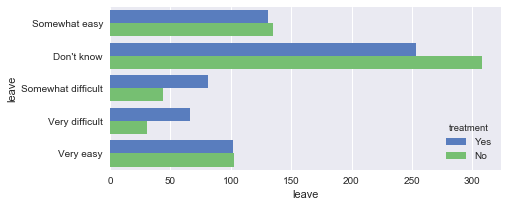


*******************************
mental_health_consequence


mental_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,224,279,118,621
Yes,252,210,171,633
All,476,489,289,1254


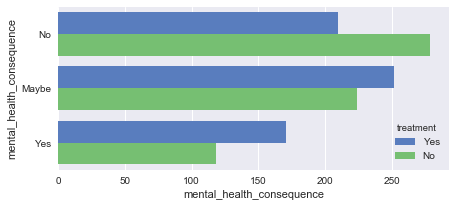


*******************************
phys_health_consequence


phys_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,127,469,25,621
Yes,146,453,34,633
All,273,922,59,1254


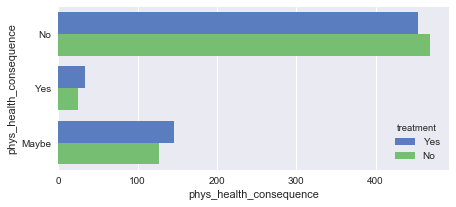


*******************************
coworkers


coworkers,No,Some of them,Yes,All
treatment,,,,
No,141,383,97,621
Yes,117,389,127,633
All,258,772,224,1254


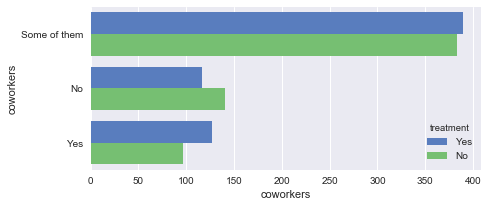


*******************************
supervisor


supervisor,No,Some of them,Yes,All
treatment,,,,
No,186,170,265,621
Yes,204,180,249,633
All,390,350,514,1254


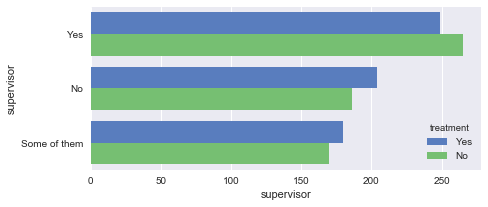


*******************************
mental_health_interview


mental_health_interview,Maybe,No,Yes,All
treatment,,,,
No,125,478,18,621
Yes,82,527,24,633
All,207,1005,42,1254


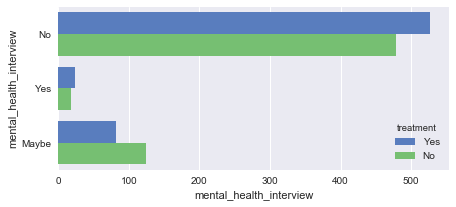


*******************************
phys_health_interview


phys_health_interview,Maybe,No,Yes,All
treatment,,,,
No,290,240,91,621
Yes,266,257,110,633
All,556,497,201,1254


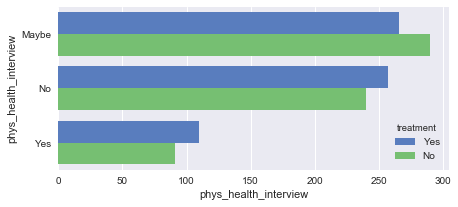


*******************************
mental_vs_physical


mental_vs_physical,Don't know,No,Yes,All
treatment,,,,
No,315,138,168,621
Yes,259,200,174,633
All,574,338,342,1254


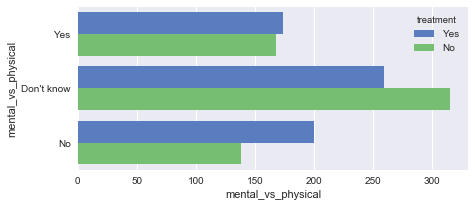


*******************************
obs_consequence


obs_consequence,No,Yes,All
treatment,,,
No,565,56,621
Yes,507,126,633
All,1072,182,1254


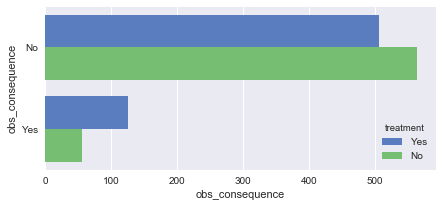


*******************************
Gender2


Gender2,Female,Male,All
treatment,,,
No,65,510,575
Yes,156,424,580
All,221,934,1155


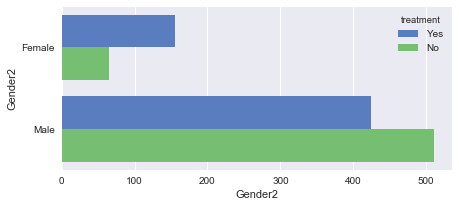


*******************************
Country2


Country2,AFRICA,ASIA,EUROPA,NORTHAMERICA,OCEANIA,SOUTHAMERICA,All
treatment,,,,,,,
No,3,16,206,378,11,7,621
Yes,4,5,157,447,18,2,633
All,7,21,363,825,29,9,1254


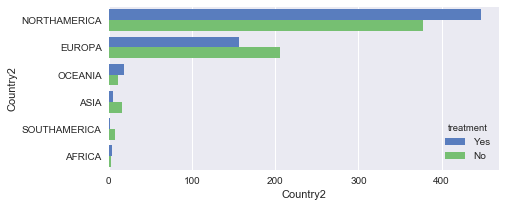


*******************************
Country3


Country3,AFRICA,ASIA,EUROPA,NORTHAMERICA,OCEANIA,SOUTHAMERICA,USA,All
treatment,,,,,,,,
No,3,16,206,38,11,7,340,621
Yes,4,5,157,39,18,2,408,633
All,7,21,363,77,29,9,748,1254


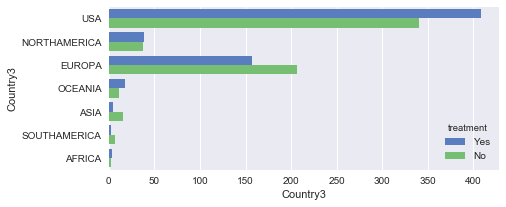


*******************************
work_interfere2


work_interfere2,No,Yes,All
treatment,,,
No,442,179,621
Yes,34,599,633
All,476,778,1254


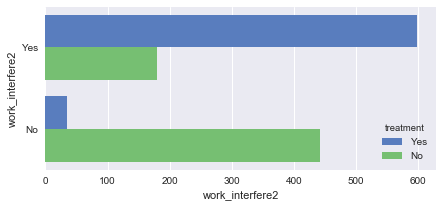


*******************************
leave2


leave2,Don't know,difficult,easy,All
treatment,,,,
No,308,75,238,621
Yes,253,147,233,633
All,561,222,471,1254


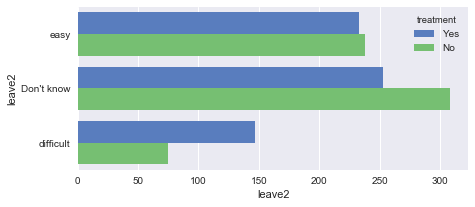

In [29]:
#精神(treatment)と年齢(Age)以外の関係性
for column in df_data.columns:
    if column in ["Timestamp", "treatment", "Gender", "comments"]:
        continue

    # 上記にて違う見せ方が良さそう
    if column in ["Age", "Country", "state", "region",  "Gender3"]:
        continue

    print("*******************************")
    print(column)
    df_c = pd.crosstab(index=df_data["treatment"], columns=df_data[column], margins=True)
    display(df_c) 

    plt.figure(figsize=(7,3))
    sns.countplot(y=column, hue="treatment", hue_order=["Yes", "No"], data=df_data)
    plt.xlabel(column)
    plt.show()

    print()
    
    
    #大体の項目はYes,No五分五分だが、family_history,work_interfere,benefits,care_options,Gender辺りは影響がありそう。

## 4-3 関係性のまとめ

__treatment と Age__  
→@20代以下はNoの割合が多いが、30代以上になるとYesの割合が多くなる。 
→@就職時期などの転換期に増減率に変化はないか？  
→@年齢につれ対象期間が長くなるので当たり前と言えば当たり前だが。。  

__treatment と その他の説明変数__  
→@大体の項目はYes,Noの割合が五分五分だが、'family_history','work_interfere','benefits','care_options','Gender'辺りは影響がありそう。

# 5.各アルゴリズムの精度検証（CV済みモデルにて）

In [30]:
#データ項目確認
print(df_data.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Gender2',
       'Gender3', 'Country2', 'Country3', 'work_interfere2', 'leave2'],
      dtype='object')


# データの前処理

下記のルールにてデータの変換を行う。  
使わないデータを削除  
"Timestamp", "Gender", "comments"  
"Gender"は、"Gender2"というキーで名寄せしたデータを管理している  
"work_interfere"は、"work_interfere2"というキーで名寄せしたデータを管理している  
"Country"は、"Country3"というキーで名寄せしたデータを管理している  
"leave"は、"leave2"というキーで名寄せしたデータを管理している  
Yes/Noの2種類の回答データの場合は、Yes:1、No:0のルールで変換  
"treatment", "family_history", "remote_work", "tech_company", "obs_consequence"  
その他のデータはダミー変数を利用  
上記により、156の説明変数で処理を行う  
なお、treatmentも数値に変換されてしまっているが、  
1: Yes => 精神疾患病  
0: No => 精神疾患病ではない  
という意味となる。  

In [31]:
# 使わないデータを削除（項目）
#'Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
#'family_history', 'treatment', 'work_interfere', 'no_employees',
#'remote_work', 'tech_company', 'benefits', 'care_options',
#'wellness_program', 'seek_help', 'anonymity', 'leave',
#'mental_health_consequence', 'phys_health_consequence', 'coworkers',
#'supervisor', 'mental_health_interview', 'phys_health_interview',
#'mental_vs_physical', 'obs_consequence', 'comments']



# 使わないデータを削除
#"Gender"@ざっくり仕分け
#df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("Gender3", axis=1).drop("comments", axis=1)
#"Gender"@しっかり仕分け
#df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("Gender2", axis=1).drop("comments", axis=1)

#"今回課題分の仕分け
df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("Gender3", axis=1).drop("work_interfere", axis=1).drop("Country", axis=1).drop("Country2", axis=1).drop("leave", axis=1).drop("comments", axis=1)


#@関係性のまとめ分析（↓下記にも記載）より、よく分からない項目は思い切って消して見る
#@大体の項目はYes,Noの割合が五分五分だが、'family_history','work_interfere','benefits','care_options','Gender'辺りは影響がありそう。
#df_data_c = df_data.drop("Timestamp", axis=1).drop("Age", axis=1).drop("Gender", axis=1).drop("Gender3", axis=1).drop("state", axis=1).drop("self_employed", axis=1).drop("remote_work", axis=1).drop("tech_company", axis=1).drop("wellness_program", axis=1).drop("seek_help", axis=1).drop("anonymity", axis=1).drop("leave", axis=1).drop("mental_health_consequence", axis=1).drop("phys_health_consequence", axis=1).drop("coworkers", axis=1).drop("supervisor", axis=1).drop("mental_health_interview", axis=1).drop("mental_vs_physical", axis=1).drop("obs_consequence", axis=1).drop("work_interfere", axis=1).drop("Country", axis=1).drop("Country2", axis=1).drop("comments", axis=1)




# 値の整形を行う
for column in df_data_c.columns:
    # YES/NOのデータの場合は、No:0, Yes:1 で置換する
    if column in ["treatment", "family_history", "remote_work", "tech_company", "obs_consequence"]:
        df_data_c[column] = df_data_c[column].map({"No": 0, "Yes": 1})

# 目的変数を一番左の列に移動させておく(計算しやすいようにするため)
col = df_data_c.columns.tolist() # 列名のリスト
col.remove('treatment')    # 先頭に移動させるため一旦リストから削除
col.insert(0, "treatment") # index:0の前にtreatmentを追加する
df_data_c = df_data_c.loc[:,col]

# ダミー変数の生成
df_data_c = pd.get_dummies(df_data_c)

display(df_data_c.head())
display(df_data_c.shape)

,treatment,Age,family_history,remote_work,tech_company,obs_consequence,state_AL,state_AZ,state_CA,state_CO,...,Country3_EUROPA,Country3_NORTHAMERICA,Country3_OCEANIA,Country3_SOUTHAMERICA,Country3_USA,work_interfere2_No,work_interfere2_Yes,leave2_Don't know,leave2_difficult,leave2_easy
0,1,37,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,44,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,32,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,31,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,31,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


(1254, 111)

In [32]:
#各データの種類の確認

for column in df_data_c.columns.values:
    if column in ["Timestamp", "comments"]:
        continue
    print(column, ":", len(set(df_data_c[column])), "件")
    print(set(df_data_c[column]))
    print()

treatment : 2 件
{0, 1}

Age : 48 件
{5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72}

family_history : 2 件
{0, 1}

remote_work : 2 件
{0, 1}

tech_company : 2 件
{0, 1}

obs_consequence : 2 件
{0, 1}

state_AL : 2 件
{0, 1}

state_AZ : 2 件
{0, 1}

state_CA : 2 件
{0, 1}

state_CO : 2 件
{0, 1}

state_CT : 2 件
{0, 1}

state_DC : 2 件
{0, 1}

state_FL : 2 件
{0, 1}

state_GA : 2 件
{0, 1}

state_IA : 2 件
{0, 1}

state_ID : 2 件
{0, 1}

state_IL : 2 件
{0, 1}

state_IN : 2 件
{0, 1}

state_KS : 2 件
{0, 1}

state_KY : 2 件
{0, 1}

state_LA : 2 件
{0, 1}

state_MA : 2 件
{0, 1}

state_MD : 2 件
{0, 1}

state_ME : 2 件
{0, 1}

state_MI : 2 件
{0, 1}

state_MN : 2 件
{0, 1}

state_MO : 2 件
{0, 1}

state_MS : 2 件
{0, 1}

state_NC : 2 件
{0, 1}

state_NE : 2 件
{0, 1}

state_NH : 2 件
{0, 1}

state_NJ : 2 件
{0, 1}

state_NM : 2 件
{0, 1}

state_NV : 2 件
{0, 1}

state_NY : 2 件
{0

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

X = X.astype("float64")
# 標準化を行うにあたり、int型だと警告エラーが出ていたので、float64型にキャストする

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
stdsc = StandardScaler()


X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[-0.38077511, -0.79379564, -0.66337447, ...,  1.09452957,
        -0.46877463, -0.75796193],
       [-0.77612607,  1.25977008,  1.50744421, ...,  1.09452957,
        -0.46877463, -0.75796193],
       [-0.51255877, -0.79379564, -0.66337447, ..., -0.91363452,
         2.13322125, -0.75796193],
       ...,
       [ 1.46419602,  1.25977008, -0.66337447, ..., -0.91363452,
        -0.46877463,  1.31932748],
       [ 0.54171045, -0.79379564, -0.66337447, ...,  1.09452957,
        -0.46877463, -0.75796193],
       [-0.11720781, -0.79379564, -0.66337447, ...,  1.09452957,
        -0.46877463, -0.75796193]])

array([[ 0.01457584, -0.79379564, -0.66337447, ...,  1.09452957,
        -0.46877463, -0.75796193],
       [ 1.99133063, -0.79379564,  1.50744421, ..., -0.91363452,
         2.13322125, -0.75796193],
       [-0.51255877, -0.79379564, -0.66337447, ..., -0.91363452,
        -0.46877463,  1.31932748],
       ...,
       [ 3.17738351, -0.79379564,  1.50744421, ..., -0.91363452,
        -0.46877463,  1.31932748],
       [-0.77612607, -0.79379564, -0.66337447, ..., -0.91363452,
        -0.46877463,  1.31932748],
       [ 1.59597967,  1.25977008, -0.66337447, ...,  1.09452957,
        -0.46877463, -0.75796193]])

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

## 5-1ロジスティック回帰(LogisticRegression)

In [34]:
# モデル作成【5-1ロジスティック回帰(LogisticRegression)】
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [35]:
# フィッティング【5-1ロジスティック回帰(LogisticRegression)】
lr.fit (X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
#判定のしきい値【5-1ロジスティック回帰(LogisticRegression)】
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

y_pred_lr[y_pred_lr < 0.5] = 0
y_pred_lr[y_pred_lr >= 0.5] = 1
print(y_pred_lr)

[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 1 0 1 0 1]
[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 

In [37]:
#評価する（混同行列）【5-1ロジスティック回帰(LogisticRegression)】
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_lr)
print('Accuracy = ',(cm_lr[0][0]+cm_lr[1][1]) / (np.array(cm_lr).sum()))
print('Recall of Yes = ',(cm_lr[1][1] / (cm_lr[1][0]+cm_lr[1][1])))
print('Precision of Yes = ',(cm_lr[1][1] / (cm_lr[0][1]+cm_lr[1][1])))

・正則化なし
Confusion Matrix : 
[[153  35]
 [ 26 163]]
Accuracy =  0.8381962864721485
Recall of Yes =  0.8624338624338624
Precision of Yes =  0.8232323232323232


## 5-2決定木(DecisionTreeClassifier)

max_depth:　最大深さ  
max_features:　使用する最大特徴数  
min_samples_leaf:　最小の最終分類数

In [38]:
# モデル作成【5-2決定木(DecisionTreeClassifier)】
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)

In [39]:
# フィッティング【5-2決定木(DecisionTreeClassifier)】
clf_tree = clf_tree.fit(X_train, y_train)
print("score=", clf_tree.score(X_train, y_train))
print(clf_tree.predict(X_test)) #予測したい場合

score= 0.9156214367160775
[0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0
 1 0 1 0 1 0 1]


[6.81914713e-02 3.47633165e-02 2.61375812e-02 8.95565225e-03
 7.41160895e-03 0.00000000e+00 0.00000000e+00 1.57982791e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.76796852e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.86290963e-03 5.58787531e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.42489567e-03 1.36108251e-03
 0.00000000e+00 0.00000000e+00 1.05622780e-02 1.01908471e-02
 5.31428226e-03 0.00000000e+00 6.79693939e-03 9.72201791e-04
 6.07626119e-03 0.00000000e+00 7.42016290e-03 5.62488179e-03
 5.01804003e-03 2.190986

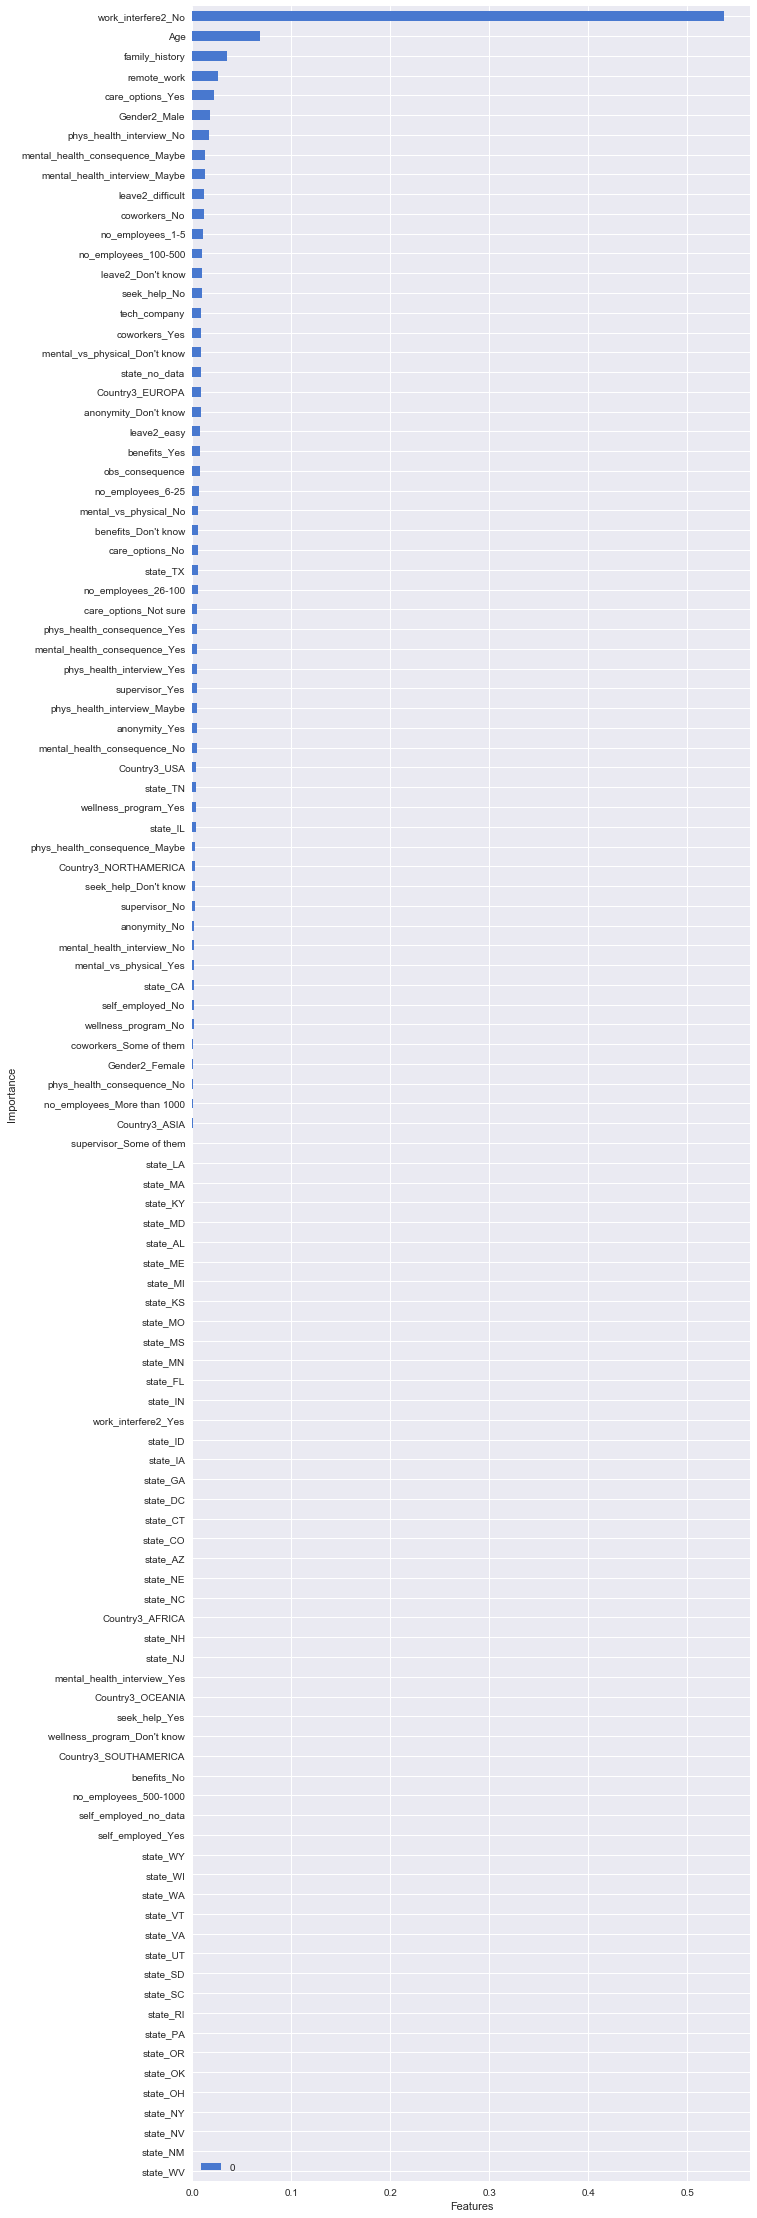

In [40]:
# 説明変数の重要度を出力する【5-2決定木(DecisionTreeClassifier)】
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf_tree.feature_importances_)
#pd.DataFrame(clf_tree.feature_importances_, index=["x1","x2"]).plot.bar(figsize=(7,2))
plot_data = pd.DataFrame(clf_tree.feature_importances_, index=df_data_c.columns.drop("treatment")).sort_values(by=0)
plot_data.plot.barh(figsize=(10,40))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

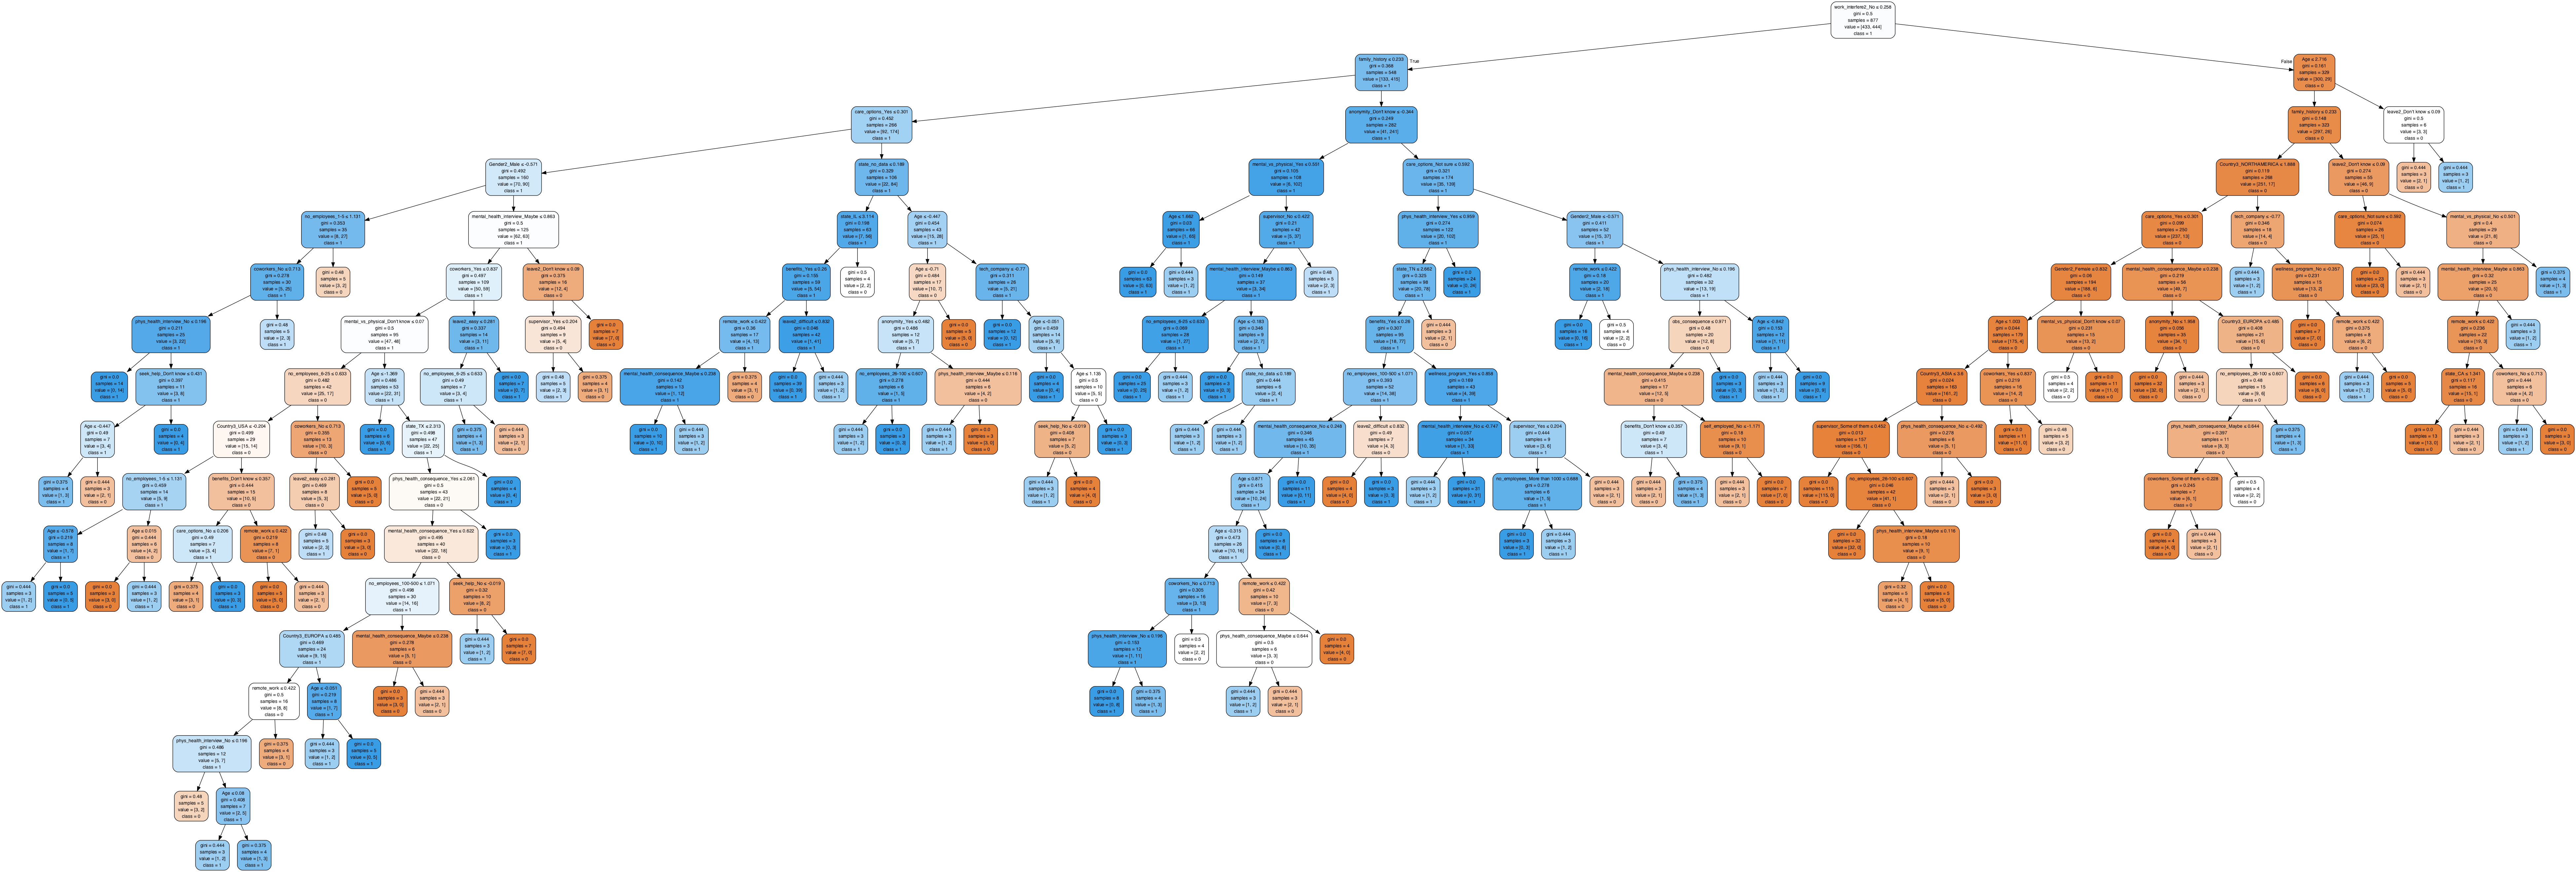

In [41]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image

# 決定木の描画【5-2決定木(DecisionTreeClassifier)】
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf_tree, out_file=dot_data,  
                     feature_names=df_data_c.columns.drop("treatment"),  
                     class_names=["0","1"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [42]:
#交差検証（グリッドサーチ）【5-2決定木(DecisionTreeClassifier)】
cv_num = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[5,10, 20, 30], 'max_features':[0.4, 0.6, 0.8, 1.0]}
clf_gs_cv_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=cv_num, scoring='accuracy')
clf_gs_cv_tree.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 30], 'max_features': [0.4, 0.6, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
clf_gs_cv_tree.best_params_

{'max_depth': 5, 'max_features': 0.4}

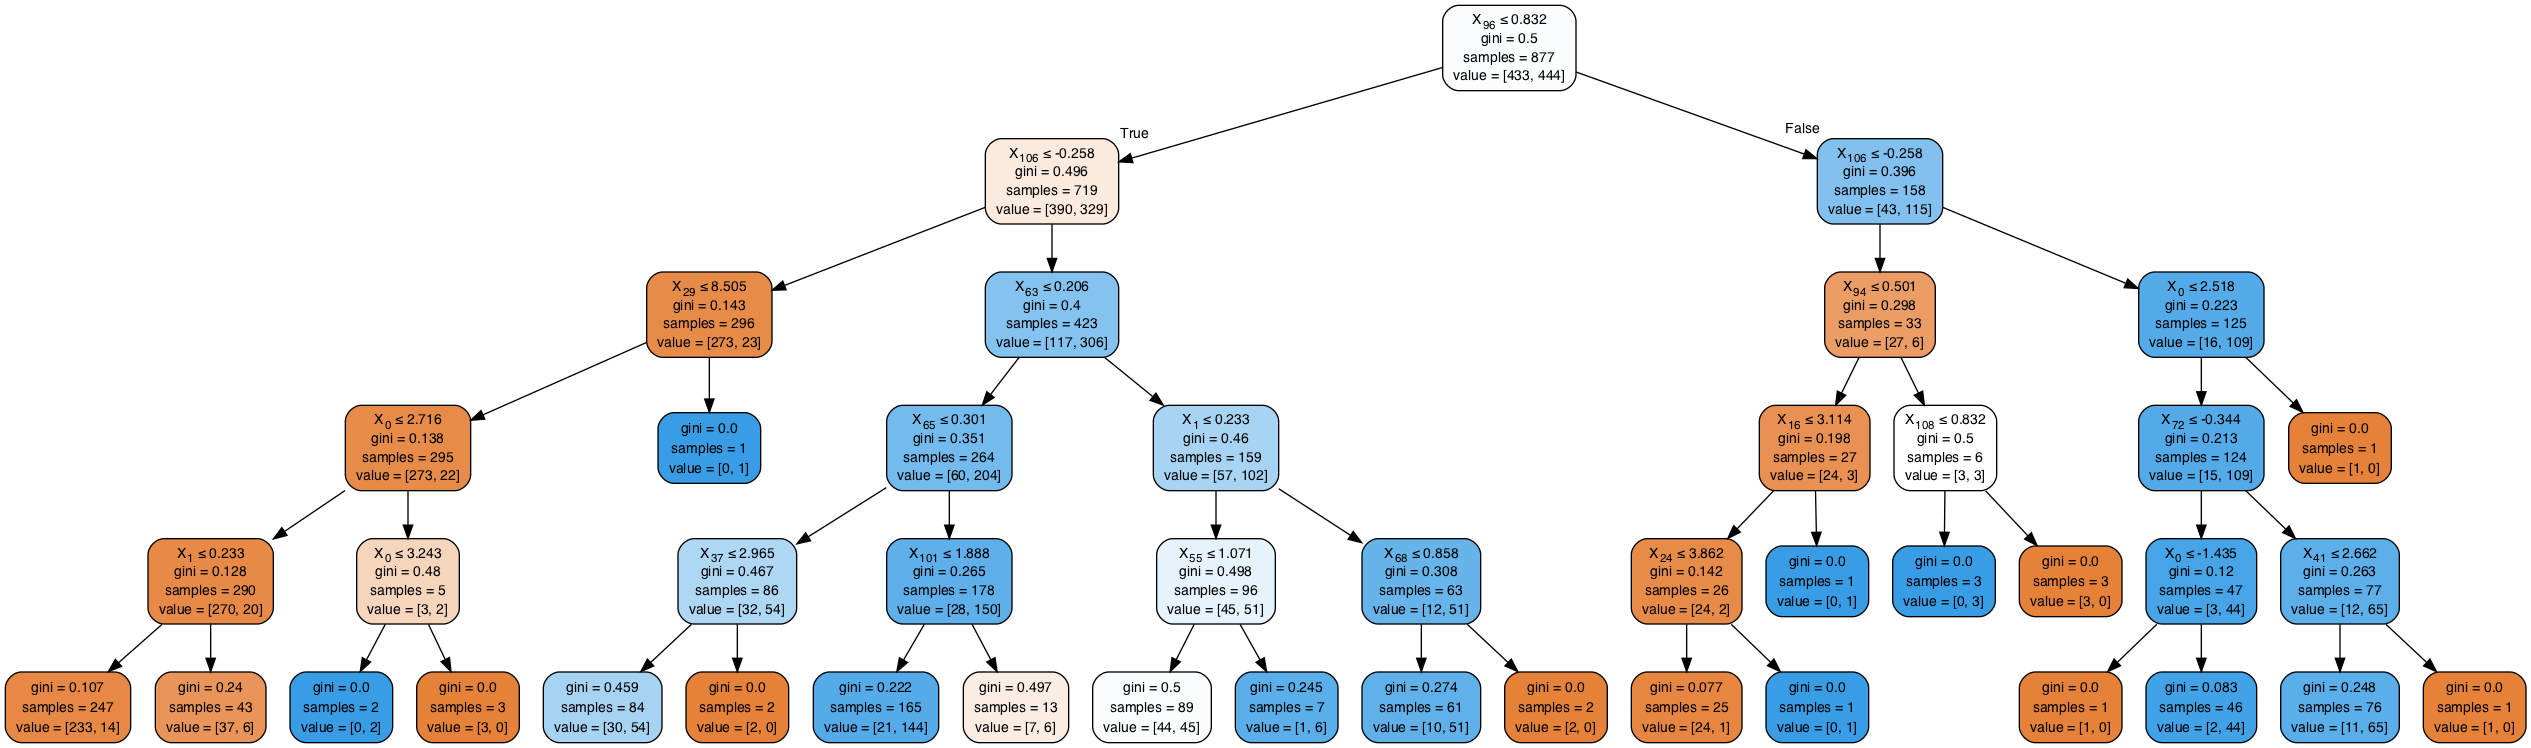

In [44]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

# 決定木の描画　@交差検証（グリッドサーチ）後【5-2決定木(DecisionTreeClassifier)】
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf_gs_cv_tree.best_estimator_, out_file=dot_data,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [45]:
#判定のしきい値【5-2決定木(DecisionTreeClassifier)】
y_pred_clf_tree = clf_gs_cv_tree.predict(X_test)
print(y_pred_clf_tree)

y_pred_clf_tree[y_pred_clf_tree < 0.5] = 0
y_pred_clf_tree[y_pred_clf_tree >= 0.5] = 1
print(y_pred_clf_tree)

[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 0 1]
[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 

In [46]:
#評価する（混同行列）【5-2決定木(DecisionTreeClassifier)】
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test, y_pred_clf_tree)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_tree)
print('Accuracy = ',(cm_tree[0][0]+cm_tree[1][1]) / (np.array(cm_tree).sum()))
print('Recall of Yes = ',(cm_tree[1][1] / (cm_tree[1][0]+cm_tree[1][1])))
print('Precision of Yes = ',(cm_tree[1][1] / (cm_tree[0][1]+cm_tree[1][1])))

・正則化なし
Confusion Matrix : 
[[142  46]
 [ 14 175]]
Accuracy =  0.8408488063660478
Recall of Yes =  0.9259259259259259
Precision of Yes =  0.7918552036199095


## 5-3バギング(BaggingClassifier)

n_estimators:　作成する認識器の数  
max_features:　各認識機を作成するのに使用する特徴数(実数の場合は比率)  
max_samples:　各認識器を作成するのに使用するデータ数(実数の場合は比率)  



In [47]:
# モデル作成【5-3バギング(BaggingClassifier)】
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 10, max_samples = 1.0, max_features = 1.0)

In [48]:
# フィッティング【5-3バギング(BaggingClassifier)】
clf_bagging = clf_bagging.fit(X_train, y_train)
print("score=", clf_bagging.score(X_train, y_train))
print(clf_bagging.predict(X_test)) #予測したい場合

score= 0.9897377423033067
[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 1]


In [49]:
#交差検証（グリッドサーチ）【5-3バギング(BaggingClassifier)】
cv_num = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid =  [{'n_estimators':[10, 30, 50, 80, 100], 'max_features':[0.4, 0.6, 0.8, 1.0], 'max_samples':[0.4, 0.6, 0.8, 1.0]}]
clf_gs_cv_bagging = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),param_grid=param_grid,cv=cv_num, scoring='accuracy')
clf_gs_cv_bagging.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30, 50, 80, 100], 'max_features': [0.4, 0.6, 0.8, 1.0], 'max_samples': [0.4, 0.6, 0.8, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
clf_gs_cv_bagging.best_params_

{'max_features': 0.4, 'max_samples': 0.4, 'n_estimators': 80}

In [51]:
#判定のしきい値【5-3バギング(BaggingClassifier)】
y_pred_clf_bagging = clf_gs_cv_bagging.predict(X_test)

y_pred_clf_bagging[y_pred_clf_bagging < 0.5] = 0
y_pred_clf_bagging[y_pred_clf_bagging >= 0.5] = 1
print(y_pred_clf_bagging)

[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1]


In [52]:
#評価する（混同行列）【5-3バギング(BaggingClassifier)】
from sklearn.metrics import confusion_matrix

cm_bagging = confusion_matrix(y_test, y_pred_clf_bagging)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_bagging)
print('Accuracy = ',(cm_bagging[0][0]+cm_bagging[1][1]) / (np.array(cm_bagging).sum()))
print('Recall of Yes = ',(cm_bagging[1][1] / (cm_bagging[1][0]+cm_bagging[1][1])))
print('Precision of Yes = ',(cm_bagging[1][1] / (cm_bagging[0][1]+cm_bagging[1][1])))

・正則化なし
Confusion Matrix : 
[[150  38]
 [ 18 171]]
Accuracy =  0.8514588859416445
Recall of Yes =  0.9047619047619048
Precision of Yes =  0.8181818181818182


## 5-4ランダムフォレスト(RandomForestClassifier)

n_estimators:　作成する決定木の数  
max_features:　最適な分割を見つけるために使用する特徴数の上限（'auto'だと全数の平方根)  
random_state:　ランダム変数の種かジェネレータの指定(Noneだとnp.randomを使用)

In [53]:
# モデル作成【5-4ランダムフォレスト(RandomForestClassifier)】
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)

In [54]:
# フィッティング【5-4ランダムフォレスト(RandomForestClassifier)】
clf_rand.fit(X_train, y_train)
print("score=", clf_rand.score(X_train, y_train))

score= 0.8152793614595211


In [55]:
#交差検証（グリッドサーチ）【5-4ランダムフォレスト(RandomForestClassifier)】
cv_num = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid =  [{'n_estimators':[10, 30, 50, 80, 100], 'max_features':[0.4, 0.6, 0.8, 1.0]}]
clf_gs_cv_rand = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=cv_num, scoring='accuracy')
clf_gs_cv_rand.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30, 50, 80, 100], 'max_features': [0.4, 0.6, 0.8, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [56]:
clf_gs_cv_rand.best_params_

{'max_features': 0.6, 'n_estimators': 100}

In [57]:
#判定のしきい値【5-4ランダムフォレスト(RandomForestClassifier)】
y_pred_clf_rand = clf_gs_cv_rand.predict(X_test)

y_pred_clf_rand[y_pred_clf_rand < 0.5] = 0
y_pred_clf_rand[y_pred_clf_rand >= 0.5] = 1
print(y_pred_clf_rand)

[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1]


In [58]:
#評価する（混同行列）【5-4ランダムフォレスト(RandomForestClassifier)】
from sklearn.metrics import confusion_matrix

cm_rand = confusion_matrix(y_test, y_pred_clf_rand)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_rand)
print('Accuracy = ',(cm_rand[0][0]+cm_rand[1][1]) / (np.array(cm_rand).sum()))
print('Recall of Yes = ',(cm_rand[1][1] / (cm_rand[1][0]+cm_rand[1][1])))
print('Precision of Yes = ',(cm_rand[1][1] / (cm_rand[0][1]+cm_rand[1][1])))

・正則化なし
Confusion Matrix : 
[[150  38]
 [ 15 174]]
Accuracy =  0.8594164456233422
Recall of Yes =  0.9206349206349206
Precision of Yes =  0.8207547169811321


## 5-5アダブースト(AdaBoostClassifier)

n_estimators:　作成する認識器の最大数（これより少なくて完全分離に成功した場合はそこまで）  
learning_rate:　最終判断に対する各認識器の寄与の大きさの逓減率？（１だとすべて対等ということか？）  
algorithm:　最適化アルゴリズム？（SAMME.Rは速く収束するとリファレンスに書かれているが、欠点は？）  
random_state:　ランダム変数の種かジェネレータの指定(Noneだとnp.randomを使用)  


In [59]:
# モデル作成【5-5アダブースト(AdaBoostClassifier)】
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,
                                                min_samples_leaf=2,
                                                min_samples_split=2, 
                                                random_state=1234,
                                                criterion="gini"),
                                                n_estimators=10,random_state=1234)

In [60]:
# フィッティング【5-5アダブースト(AdaBoostClassifier)】
clf_ada.fit(X_train, y_train)
print("score=", clf_ada.score(X_train, y_train))

score= 0.8654503990877993


In [61]:
#交差検証（グリッドサーチ）【5-5アダブースト(AdaBoostClassifier)】
cv_num = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[10, 30, 50, 80, 100], 'learning_rate':[0.4, 0.6, 0.8, 1.0]}]
clf_gs_cv_ada = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), algorithm='SAMME.R', random_state=None), param_grid, cv = cv_num, scoring='accuracy')
clf_gs_cv_ada.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30, 50, 80, 100], 'learning_rate': [0.4, 0.6, 0.8, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
clf_gs_cv_ada.best_params_

{'learning_rate': 0.8, 'n_estimators': 10}

In [63]:
#判定のしきい値【5-5アダブースト(AdaBoostClassifier)】
y_pred_clf_ada = clf_gs_cv_ada.predict(X_test)

y_pred_clf_ada[y_pred_clf_ada < 0.5] = 0
y_pred_clf_ada[y_pred_clf_ada >= 0.5] = 1
print(y_pred_clf_ada)

[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 1]


In [64]:
#評価する（混同行列）【5-5アダブースト(AdaBoostClassifier)】
from sklearn.metrics import confusion_matrix

cm_ada = confusion_matrix(y_test, y_pred_clf_ada)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_ada)
print('Accuracy = ',(cm_ada[0][0]+cm_ada[1][1]) / (np.array(cm_ada).sum()))
print('Recall of Yes = ',(cm_ada[1][1] / (cm_ada[1][0]+cm_ada[1][1])))
print('Precision of Yes = ',(cm_ada[1][1] / (cm_ada[0][1]+cm_ada[1][1])))

・正則化なし
Confusion Matrix : 
[[156  32]
 [ 50 139]]
Accuracy =  0.7824933687002652
Recall of Yes =  0.7354497354497355
Precision of Yes =  0.8128654970760234


## 5-6K近傍法（KNeighborsClassifier)

n_neighbors:　クラス判定に使用する近接点の個数

In [65]:
# モデル作成【5-6K近傍法（KNeighborsClassifier)】
from sklearn.neighbors import KNeighborsClassifier
clf_kn = KNeighborsClassifier(n_neighbors=5)

In [66]:
# フィッティング【5-6K近傍法（KNeighborsClassifier)】
clf_kn.fit(X_train, y_train)
print("score=", clf_kn.score(X_train, y_train))

score= 0.8038768529076397


In [67]:
#交差検証（グリッドサーチ）【5-6K近傍法（KNeighborsClassifier)】
cv_num = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid =  [{'n_neighbors':[1, 3, 5, 8, 10, 12]}]
clf_gs_cv_kn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = cv_num, scoring='accuracy')
clf_gs_cv_kn.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 3, 5, 8, 10, 12]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
clf_gs_cv_kn.best_params_

{'n_neighbors': 12}

In [69]:
#判定のしきい値【5-6K近傍法（KNeighborsClassifier)】
y_pred_clf_kn = clf_gs_cv_kn.predict(X_test)

y_pred_clf_kn[y_pred_clf_kn < 0.5] = 0
y_pred_clf_kn[y_pred_clf_kn >= 0.5] = 1
print(y_pred_clf_kn)

[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 1]


In [70]:
#評価する（混同行列）【5-6K近傍法（KNeighborsClassifier)】
from sklearn.metrics import confusion_matrix

cm_kn = confusion_matrix(y_test, y_pred_clf_kn)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_kn)
print('Accuracy = ',(cm_kn[0][0]+cm_kn[1][1]) / (np.array(cm_kn).sum()))
print('Recall of Yes = ',(cm_kn[1][1] / (cm_kn[1][0]+cm_kn[1][1])))
print('Precision of Yes = ',(cm_kn[1][1] / (cm_kn[0][1]+cm_kn[1][1])))

・正則化なし
Confusion Matrix : 
[[159  29]
 [ 65 124]]
Accuracy =  0.7506631299734748
Recall of Yes =  0.656084656084656
Precision of Yes =  0.8104575163398693


## 5-7SVM(SVC)

In [71]:
# モデル作成【5-7SVM(SVC)】
from sklearn.neighbors import KNeighborsClassifier
clf_kn = KNeighborsClassifier(n_neighbors=5)

from sklearn import svm

C = 5
clf_SVC = svm.SVC(C=C, kernel="linear")
clf_SVC.fit(X_train, y_train)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
# フィッティング【5-7SVM(SVC)】
clf_SVC.fit(X_train, y_train)
print("score=", clf_SVC.score(X_train, y_train))

score= 0.8209806157354618


In [73]:
#交差検証（グリッドサーチ）【5-7SVM(SVC)】
cv_num = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = [{'C':[0.4, 0.8, 1.0, 1.2, 1.4, 1.8, 2.0]}]
clf_gs_cv_svm = GridSearchCV(svm.SVC(), param_grid, cv = cv_num, scoring='accuracy')
clf_gs_cv_svm.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.4, 0.8, 1.0, 1.2, 1.4, 1.8, 2.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
clf_gs_cv_svm.best_params_

{'C': 0.4}

In [75]:
#判定のしきい値【5-7SVM(SVC)】
y_pred_clf_svm = clf_gs_cv_svm.predict(X_test)

y_pred_clf_svm[y_pred_clf_svm < 0.5] = 0
y_pred_clf_svm[y_pred_clf_svm >= 0.5] = 1
print(y_pred_clf_svm)

[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 0]


In [76]:
#評価する（混同行列）【5-7SVM(SVC)】
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_clf_svm)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm_svm)
print('Accuracy = ',(cm_svm[0][0]+cm_svm[1][1]) / (np.array(cm_svm).sum()))
print('Recall of Yes = ',(cm_svm[1][1] / (cm_svm[1][0]+cm_svm[1][1])))
print('Precision of Yes = ',(cm_svm[1][1] / (cm_svm[0][1]+cm_svm[1][1])))

・正則化なし
Confusion Matrix : 
[[143  45]
 [ 13 176]]
Accuracy =  0.8461538461538461
Recall of Yes =  0.9312169312169312
Precision of Yes =  0.7963800904977375


# 6.各モデルの比較

## 6-1モデル比較

In [77]:
print('5-1ロジスティック回帰(LogisticRegression)')
print(cm_lr)
print('Accuracy = ',(cm_lr[0][0]+cm_lr[1][1]) / (np.array(cm_lr).sum()))
print('Recall of Yes = ',(cm_lr[1][1] / (cm_lr[1][0]+cm_lr[1][1])))
print('Precision of Yes = ',(cm_lr[1][1] / (cm_lr[0][1]+cm_lr[1][1])))  
print()  

print('5-2決定木(DecisionTreeClassifier)')
print(cm_tree)
print('Accuracy = ',(cm_tree[0][0]+cm_tree[1][1]) / (np.array(cm_tree).sum()))
print('Recall of Yes = ',(cm_tree[1][1] / (cm_tree[1][0]+cm_tree[1][1])))
print('Precision of Yes = ',(cm_tree[1][1] / (cm_tree[0][1]+cm_tree[1][1])))  
print()  

print('5-3バギング(BaggingClassifier)')
print(cm_bagging)
print('Accuracy = ',(cm_bagging[0][0]+cm_bagging[1][1]) / (np.array(cm_bagging).sum()))
print('Recall of Yes = ',(cm_bagging[1][1] / (cm_bagging[1][0]+cm_bagging[1][1])))
print('Precision of Yes = ',(cm_bagging[1][1] / (cm_bagging[0][1]+cm_bagging[1][1])))
print()  

print('5-4ランダムフォレスト(RandomForestClassifier)')
print(cm_rand)
print('Accuracy = ',(cm_rand[0][0]+cm_rand[1][1]) / (np.array(cm_rand).sum()))
print('Recall of Yes = ',(cm_rand[1][1] / (cm_rand[1][0]+cm_rand[1][1])))
print('Precision of Yes = ',(cm_rand[1][1] / (cm_rand[0][1]+cm_rand[1][1])))  
print()  

print('5-5アダブースト(AdaBoostClassifier)')
print(cm_ada)
print('Accuracy = ',(cm_ada[0][0]+cm_ada[1][1]) / (np.array(cm_ada).sum()))
print('Recall of Yes = ',(cm_ada[1][1] / (cm_ada[1][0]+cm_ada[1][1])))
print('Precision of Yes = ',(cm_ada[1][1] / (cm_ada[0][1]+cm_ada[1][1])))  
print()  

print('5-6K近傍法(KNeighborsClassifier)')
print(cm_kn)
print('Accuracy = ',(cm_kn[0][0]+cm_kn[1][1]) / (np.array(cm_kn).sum()))
print('Recall of Yes = ',(cm_kn[1][1] / (cm_kn[1][0]+cm_kn[1][1])))
print('Precision of Yes = ',(cm_kn[1][1] / (cm_kn[0][1]+cm_kn[1][1]))) 
print()  

print('5-7SVM(SVC)')
print(cm_svm)
print('Accuracy = ',(cm_svm[0][0]+cm_svm[1][1]) / (np.array(cm_svm).sum()))
print('Recall of Yes = ',(cm_svm[1][1] / (cm_svm[1][0]+cm_svm[1][1])))
print('Precision of Yes = ',(cm_svm[1][1] / (cm_svm[0][1]+cm_svm[1][1]))) 
print()  

5-1ロジスティック回帰(LogisticRegression)
[[153  35]
 [ 26 163]]
Accuracy =  0.8381962864721485
Recall of Yes =  0.8624338624338624
Precision of Yes =  0.8232323232323232

5-2決定木(DecisionTreeClassifier)
[[142  46]
 [ 14 175]]
Accuracy =  0.8408488063660478
Recall of Yes =  0.9259259259259259
Precision of Yes =  0.7918552036199095

5-3バギング(BaggingClassifier)
[[150  38]
 [ 18 171]]
Accuracy =  0.8514588859416445
Recall of Yes =  0.9047619047619048
Precision of Yes =  0.8181818181818182

5-4ランダムフォレスト(RandomForestClassifier)
[[150  38]
 [ 15 174]]
Accuracy =  0.8594164456233422
Recall of Yes =  0.9206349206349206
Precision of Yes =  0.8207547169811321

5-5アダブースト(AdaBoostClassifier)
[[156  32]
 [ 50 139]]
Accuracy =  0.7824933687002652
Recall of Yes =  0.7354497354497355
Precision of Yes =  0.8128654970760234

5-6K近傍法(KNeighborsClassifier)
[[159  29]
 [ 65 124]]
Accuracy =  0.7506631299734748
Recall of Yes =  0.656084656084656
Precision of Yes =  0.8104575163398693

5-7SVM(SVC)
[[143  45]
 [ 13 176]

# @1回目

#@1回目  
5-1ロジスティック回帰(LogisticRegression)  
[[150  39]  
 [ 31 157]]  
Accuracy =  0.8143236074270557  
Recall of Yes =  0.8351063829787234  
Precision of Yes =  0.8010204081632653  
  
5-2決定木(DecisionTreeClassifier)  
[[134  55]  
 [ 12 176]]  
Accuracy =  0.8222811671087533  
Recall of Yes =  0.9361702127659575  
Precision of Yes =  0.7619047619047619  
  
5-3バギング(BaggingClassifier)  
[[142  47]  
 [ 20 168]]  
Accuracy =  0.8222811671087533  
Recall of Yes =  0.8936170212765957  
Precision of Yes =  0.7813953488372093  

5-4ランダムフォレスト(RandomForestClassifier)  
[[141  48]  
 [ 20 168]]  
Accuracy =  0.8196286472148541  
Recall of Yes =  0.8936170212765957  
Precision of Yes =  0.7777777777777778  

5-5アダブースト(AdaBoostClassifier)  
[[141  48]  
 [ 48 140]]  
Accuracy =  0.7453580901856764  
Recall of Yes =  0.7446808510638298  
Precision of Yes =  0.7446808510638298  

5-6K近傍法(KNeighborsClassifier)  
[[144  45]  
 [ 81 107]]  
Accuracy =  0.6657824933687002  
Recall of Yes =  0.5691489361702128  
Precision of Yes =  0.7039473684210527  
  
5-7SVM(SVC)
[[128  61]  
 [ 10 178]]  
Accuracy =  0.8116710875331565  
Recall of Yes =  0.9468085106382979  
Precision of Yes =  0.7447698744769874  


# @２回目

#@２回目  
5-1ロジスティック回帰(LogisticRegression)  
[[137  47]  
 [ 28 165]]  
Accuracy =  0.8010610079575596  
Recall of Yes =  0.8549222797927462  
Precision of Yes =  0.7783018867924528  
  
5-2決定木(DecisionTreeClassifier)  
[[121  63]  
 [ 17 176]]  
Accuracy =  0.7877984084880637  
Recall of Yes =  0.9119170984455959  
Precision of Yes =  0.7364016736401674  
  
5-3バギング(BaggingClassifier)  
[[135  49]  
 [ 35 158]]  
Accuracy =  0.7771883289124668  
Recall of Yes =  0.8186528497409327  
Precision of Yes =  0.7632850241545893  
  
5-4ランダムフォレスト(RandomForestClassifier)  
[[132  52]  
 [ 28 165]]  
Accuracy =  0.7877984084880637  
Recall of Yes =  0.8549222797927462  
Precision of Yes =  0.7603686635944701  
  
5-5アダブースト(AdaBoostClassifier)  
[[131  53]  
 [ 56 137]]  
Accuracy =  0.7108753315649867  
Recall of Yes =  0.7098445595854922  
Precision of Yes =  0.7210526315789474  
  
5-6K近傍法(KNeighborsClassifier)  
[[147  37]  
 [ 82 111]]  
Accuracy =  0.6843501326259946  
Recall of Yes =  0.5751295336787565  
Precision of Yes =  0.75  
  
5-7SVM(SVC)  
[[131  53]  
 [ 16 177]]  
Accuracy =  0.8169761273209549  
Recall of Yes =  0.917098445595855  
Precision of Yes =  0.7695652173913043  


# @3回目  

#@3回目  
5-1ロジスティック回帰(LogisticRegression)  
[[146  44]  
 [ 21 166]]  
Accuracy =  0.8275862068965517  
Recall of Yes =  0.8877005347593583  
Precision of Yes =  0.7904761904761904  
  
5-2決定木(DecisionTreeClassifier)  
[[149  41]  
 [ 25 162]]  
Accuracy =  0.8249336870026526  
Recall of Yes =  0.8663101604278075  
Precision of Yes =  0.7980295566502463  
  
5-3バギング(BaggingClassifier)  
[[146  44]  
 [ 16 171]]  
Accuracy =  0.8408488063660478  
Recall of Yes =  0.9144385026737968  
Precision of Yes =  0.7953488372093023  
  
5-4ランダムフォレスト(RandomForestClassifier)  
[[145  45]  
 [ 15 172]]  
Accuracy =  0.8408488063660478  
Recall of Yes =  0.9197860962566845  
Precision of Yes =  0.7926267281105991  
  
5-5アダブースト(AdaBoostClassifier)  
[[139  51]  
 [ 49 138]]  
Accuracy =  0.7347480106100795  
Recall of Yes =  0.7379679144385026  
Precision of Yes =  0.7301587301587301  
  
5-6K近傍法(KNeighborsClassifier)  
[[156  34]  
 [ 64 123]]  
Accuracy =  0.7400530503978779  
Recall of Yes =  0.6577540106951871  
Precision of Yes =  0.7834394904458599  
  
5-7SVM(SVC)  
[[141  49]  
 [ 13 174]]  
Accuracy =  0.8355437665782494  
Recall of Yes =  0.93048128342246  
Precision of Yes =  0.7802690582959642  

# @4回目  

#@4回目  
5-1ロジスティック回帰(LogisticRegression)  
[[142  46]  
 [ 20 169]]  
Accuracy =  0.8249336870026526  
Recall of Yes =  0.8941798941798942  
Precision of Yes =  0.786046511627907  
  
5-2決定木(DecisionTreeClassifier)  
[[142  46]  
 [ 18 171]]  
Accuracy =  0.830238726790451  
Recall of Yes =  0.9047619047619048  
Precision of Yes =  0.7880184331797235  
  
5-3バギング(BaggingClassifier)  
[[141  47]  
 [ 11 178]]  
Accuracy =  0.8461538461538461  
Recall of Yes =  0.9417989417989417  
Precision of Yes =  0.7911111111111111  
  
5-4ランダムフォレスト(RandomForestClassifier)  
[[143  45]  
 [ 20 169]]  
Accuracy =  0.8275862068965517  
Recall of Yes =  0.8941798941798942  
Precision of Yes =  0.7897196261682243  
  
5-5アダブースト(AdaBoostClassifier)  
[[143  45]  
 [ 43 146]]  
Accuracy =  0.76657824933687  
Recall of Yes =  0.7724867724867724  
Precision of Yes =  0.7643979057591623  
  
5-6K近傍法(KNeighborsClassifier)  
[[151  37]  
 [ 61 128]]  
Accuracy =  0.7400530503978779  
Recall of Yes =  0.6772486772486772  
Precision of Yes =  0.7757575757575758  
  
5-7SVM(SVC)  
[[138  50]  
 [ 17 172]]  
Accuracy =  0.8222811671087533  
Recall of Yes =  0.91005291005291  
Precision of Yes =  0.7747747747747747  

# @5回目  

#@5回目  
5-1ロジスティック回帰(LogisticRegression)  
[[146  38]  
 [ 29 164]]  
Accuracy =  0.8222811671087533  
Recall of Yes =  0.8497409326424871  
Precision of Yes =  0.8118811881188119  
  
5-2決定木(DecisionTreeClassifier)  
[[136  48]  
 [ 16 177]]  
Accuracy =  0.830238726790451  
Recall of Yes =  0.917098445595855  
Precision of Yes =  0.7866666666666666  
  
5-3バギング(BaggingClassifier)  
[[147  37]  
 [ 24 169]]  
Accuracy =  0.8381962864721485  
Recall of Yes =  0.8756476683937824  
Precision of Yes =  0.8203883495145631  
  
5-4ランダムフォレスト(RandomForestClassifier)  
[[145  39]  
 [ 19 174]]  
Accuracy =  0.8461538461538461  
Recall of Yes =  0.9015544041450777  
Precision of Yes =  0.8169014084507042  

5-5アダブースト(AdaBoostClassifier)  
[[138  46]  
 [ 46 147]]  
Accuracy =  0.7559681697612732  
Recall of Yes =  0.7616580310880829  
Precision of Yes =  0.7616580310880829  
  
5-6K近傍法(KNeighborsClassifier)  
[[145  39]  
 [ 73 120]]  
Accuracy =  0.7029177718832891  
Recall of Yes =  0.6217616580310881  
Precision of Yes =  0.7547169811320755  
  
5-7SVM(SVC)  
[[139  45]  
 [ 25 168]]  
Accuracy =  0.8143236074270557  
Recall of Yes =  0.8704663212435233  
Precision of Yes =  0.7887323943661971  

## 6-2所見

__@5回(+1回)ほど回してみての所見__  
  
5-1ロジスティック回帰(LogisticRegression)  
min(@2回目): Accuracy = 0.8010610079575596 /// Recall of Yes = 0.8549222797927462 /// Precision of Yes = 0.7783018867924528  
max(@6回目): Accuracy = 0.8381962864721485 /// Recall of Yes = 0.8624338624338624 /// Precision of Yes = 0.8232323232323232  
感覚値:Accuracy = 80-83%  
  
5-2決定木(DecisionTreeClassifier)  
min(@2回目): Accuracy = 0.7877984084880637 /// Recall of Yes = 0.9119170984455959 /// Precision of Yes = 0.7364016736401674  
max(@6回目): Accuracy = 0.8408488063660478 /// Recall of Yes = 0.9259259259259259 /// Precision of Yes = 0.7918552036199095  
感覚値:Accuracy = 82-84%  
  
5-3バギング(BaggingClassifier)  
min(@2回目): Accuracy = 0.7771883289124668 /// Recall of Yes = 0.8186528497409327 /// Precision of Yes = 0.7632850241545893  
max(@6回目): Accuracy = 0.8514588859416445 /// Recall of Yes = 0.9047619047619048 /// Precision of Yes = 0.8181818181818182  
感覚値:Accuracy = 82-84%  
  
5-4ランダムフォレスト(RandomForestClassifier)  
min(@2回目): Accuracy = 0.7877984084880637 /// Recall of Yes = 0.8549222797927462 /// Precision of Yes = 0.7603686635944701  
max(@6回目): Accuracy = 0.8594164456233422 /// Recall of Yes = 0.9206349206349206 /// Precision of Yes = 0.8207547169811321  
感覚値:Accuracy = 82-84%  
  
5-5アダブースト(AdaBoostClassifier)  
min(@2回目): Accuracy = 0.7108753315649867 /// Recall of Yes = 0.7098445595854922 /// Precision of Yes = 0.7210526315789474  
max(@6回目): Accuracy = 0.7824933687002652 /// Recall of Yes = 0.7354497354497355 /// Precision of Yes = 0.8128654970760234  
感覚値:Accuracy = 73-76%  
  
5-6K近傍法(KNeighborsClassifier)  
min(@1回目): Accuracy = 0.6657824933687002 /// Recall of Yes = 0.5691489361702128 /// Precision of Yes = 0.7039473684210527  
max(@6回目): Accuracy = 0.7506631299734748 /// Recall of Yes = 0.656084656084656 /// Precision of Yes = 0.8104575163398693  
感覚値:Accuracy = 67-74%  
  
5-7SVM(SVC)  
min(@1回目): Accuracy = 0.8116710875331565 /// Recall of Yes = 0.9468085106382979 /// Precision of Yes = 0.7447698744769874  
max(@6回目): Accuracy = 0.8461538461538461 /// Recall of Yes = 0.9312169312169312 /// Precision of Yes = 0.7963800904977375  
感覚値:Accuracy = 81-83%  

→@ロジスティック回帰とSVMは安定して良い値を出す傾向があると感じた  
→@バキングやランダムフォレストなどはかなり高い値を出す事が多かったが、たまに極端に低い値出す事もあった  
→@アダブーストとk近傍法は安定して低い値をしかでなかった  


# 7.精度向上検討

## 7-1検討事項

→@名寄せを工夫した  
→@'Country','work_interfere','leave'などひとまとまりに出来るものはまとめた  
→@'work_interfere'の'no_data'について【'treatment' = 精神病の治療を受けたことがあるか(目的変数】を経験した事がないので、  
　回答すらしないのではないかと考え、'No'とした  

## 7-2検討結果

→@'work_interfere'の効果により精度がかなり向上した

# 8.まとめ

## 8-1まとめ

・名寄せは大事  
・やりたい事をやるにはpythonを使いこなせないといけない  
・説明変数の合成などやってみたかった  
・ハイパーパラメータの調整はもう少しやってみたかった  
・アルゴリズムの使い分けをもう少し勉強する必要がある  
・正則化なども考慮して不要なパラメータの影響を削減してみたかった  
・複数の変数を組み合わせて新しい変数を作ってみたかった  
・コメントを工夫して説明変数に取り込めればかなり精度が上がる可能性を感じた  
・'state'については外部の情報を組み合わせて見ると色々と見えてくるものがあると感じた  

## 8-2終わりに

→@プログラミングや数学、各種用語やコマンドなど基本的な部分が分からない所からのスタートだったので、  
   時間が大分かかったが、作業自体は楽しかったのでこれから色々と試してみたい。  
→@日常業務とのバランスが難しかったが間を見つけながら勉強できたので、良かった。  
→@また、時間を作って他の課題もやってみたいと思った。  